<a href="https://colab.research.google.com/github/mvfelipelli/DataAnalyticsPortfolio/blob/main/tse_candidatura_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estudo da Base de Candidatos do TSE

## Instalação de Libs

In [ ]:
!pip install requests -U
!pip install pandas -U
!pip install matplotlib -U
!pip install seaborn

## Importando Libs

In [29]:
import requests
import zipfile
import pandas as pd
import io
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.float_format', '{:,.2f}'.format)

pd.set_option('display.max_columns', None)


## Download e Importação dos Arquivos

### Arquivo de Candidatos

In [30]:

# URL do arquivo ZIP
url = 'https://cdn.tse.jus.br/estatistica/sead/odsele/consulta_cand/consulta_cand_2024.zip'

# Faz o download do arquivo
response = requests.get(url)
if response.status_code == 200:
    # Abre o arquivo ZIP em memória
    with zipfile.ZipFile(io.BytesIO(response.content)) as zip_ref:
        # Lista os arquivos dentro do ZIP
        file_names = zip_ref.namelist()

        # Procura por um arquivo CSV
        for file_name in file_names:
            if file_name.endswith('BRASIL.csv'):
                # Lê o arquivo CSV diretamente do ZIP em um DataFrame
                with zip_ref.open(file_name) as file:
                    df_candidatos = pd.read_csv(file,sep=';', encoding='latin')
else:
    print(f"Falha ao baixar o arquivo: {response.status_code}")


In [31]:
df_candidatos.head()

DT_GERACAO HH_GERACAO  ANO_ELEICAO  CD_TIPO_ELEICAO    NM_TIPO_ELEICAO  \
0  30/09/2024   16:32:09         2024                2  ELEIÇÃO ORDINÁRIA   
1  30/09/2024   16:32:09         2024                2  ELEIÇÃO ORDINÁRIA   
2  30/09/2024   16:32:09         2024                2  ELEIÇÃO ORDINÁRIA   
3  30/09/2024   16:32:09         2024                2  ELEIÇÃO ORDINÁRIA   
4  30/09/2024   16:32:09         2024                2  ELEIÇÃO ORDINÁRIA   

   NR_TURNO  CD_ELEICAO                DS_ELEICAO  DT_ELEICAO  \
0         1         619  Eleições Municipais 2024  06/10/2024   
1         1         619  Eleições Municipais 2024  06/10/2024   
2         1         619  Eleições Municipais 2024  06/10/2024   
3         1         619  Eleições Municipais 2024  06/10/2024   
4         1         619  Eleições Municipais 2024  06/10/2024   

  TP_ABRANGENCIA_ELEICAO SG_UF  SG_UE                     NM_UE  CD_CARGO  \
0              MUNICIPAL    MG  42234                CAMPO BELO        13   
1              MUNICIPAL    MT  90670                    CUIABÁ        13   
2              MUNICIPAL    PE  25674  SÃO JOSÉ DA COROA GRANDE        13   
3              MUNICIPAL    MG  46078                     IJACI        13   
4              MUNICIPAL    SC  80799            CAXAMBU DO SUL        13   

   DS_CARGO  SQ_CANDIDATO  NR_CANDIDATO                 NM_CANDIDATO  \
0  VEREADOR  130002111603         40222              JUAREZ DA SILVA   
1  VEREADOR  110002387943         43777      MARCIA DE SOUZA CARDOSO   
2  VEREADOR  170002311553         13113       ALDEIR MATIAS DA SILVA   
3  VEREADOR  130002351592         77118  ANTÔNIO DOMINGOS DOS SANTOS   
4  VEREADOR  240002334154         15022              VELAMIR PEREIRA   

            NM_URNA_CANDIDATO NM_SOCIAL_CANDIDATO  NR_CPF_CANDIDATO  \
0      JUAREZ FURADOR DE POÇO              #NULO#                -4   
1  MARCIA EDUCADORA AMBIENTAL              #NULO#                -4   
2          SIVUCA ELETRONICA               #NULO#                -4   
3        JUNINHO DA ROSÂNGELA              #NULO#                -4   
4             VELAMIR PEREIRA              #NULO#                -4   

         DS_EMAIL  CD_SITUACAO_CANDIDATURA DS_SITUACAO_CANDIDATURA  \
0  NÃO DIVULGÁVEL                       -3                     #NE   
1  NÃO DIVULGÁVEL                       -3                     #NE   
2  NÃO DIVULGÁVEL                       -3                     #NE   
3  NÃO DIVULGÁVEL                       -3                     #NE   
4  NÃO DIVULGÁVEL                       -3                     #NE   

     TP_AGREMIACAO  NR_PARTIDO     SG_PARTIDO  \
0  PARTIDO ISOLADO          40            PSB   
1        FEDERAÇÃO          43             PV   
2        FEDERAÇÃO          13             PT   
3  PARTIDO ISOLADO          77  SOLIDARIEDADE   
4  PARTIDO ISOLADO          15            MDB   

                         NM_PARTIDO  NR_FEDERACAO  \
0     PARTIDO SOCIALISTA BRASILEIRO            -1   
1                     PARTIDO VERDE           101   
2         PARTIDO DOS TRABALHADORES           101   
3                     SOLIDARIEDADE            -1   
4  MOVIMENTO DEMOCRÁTICO BRASILEIRO            -1   

                                NM_FEDERACAO   SG_FEDERACAO  \
0                                     #NULO#         #NULO#   
1  Federação BRASIL DA ESPERANÇA - FE BRASIL  PT/PC do B/PV   
2  Federação BRASIL DA ESPERANÇA - FE BRASIL  PT/PC do B/PV   
3                                     #NULO#         #NULO#   
4                                     #NULO#         #NULO#   

  DS_COMPOSICAO_FEDERACAO  SQ_COLIGACAO     NM_COLIGACAO  \
0                  #NULO#  130001726276  PARTIDO ISOLADO   
1           PT/PC do B/PV  110001708632        FEDERAÇÃO   
2           PT/PC do B/PV  170001753987        FEDERAÇÃO   
3                  #NULO#  130001759457  PARTIDO ISOLADO   
4                  #NULO#  240001757039  PARTIDO ISOLADO   

                             DS_COMPOSICAO_COLIGACA

In [32]:
df_candidatos.dtypes

DT_GERACAO                       object
HH_GERACAO                       object
ANO_ELEICAO                       int64
CD_TIPO_ELEICAO                   int64
NM_TIPO_ELEICAO                  object
NR_TURNO                          int64
CD_ELEICAO                        int64
DS_ELEICAO                       object
DT_ELEICAO                       object
TP_ABRANGENCIA_ELEICAO           object
SG_UF                            object
SG_UE                             int64
NM_UE                            object
CD_CARGO                          int64
DS_CARGO                         object
SQ_CANDIDATO                      int64
NR_CANDIDATO                      int64
NM_CANDIDATO                     object
NM_URNA_CANDIDATO                object
NM_SOCIAL_CANDIDATO              object
NR_CPF_CANDIDATO                  int64
DS_EMAIL                         object
CD_SITUACAO_CANDIDATURA           int64
DS_SITUACAO_CANDIDATURA          object
TP_AGREMIACAO                    object
NR_PARTIDO                        int64
SG_PARTIDO                       object
NM_PARTIDO                       object
NR_FEDERACAO                      int64
NM_FEDERACAO                     object
SG_FEDERACAO                     object
DS_COMPOSICAO_FEDERACAO          object
SQ_COLIGACAO                      int64
NM_COLIGACAO                     object
DS_COMPOSICAO_COLIGACAO          object
SG_UF_NASCIMENTO                 object
DT_NASCIMENTO                    object
NR_TITULO_ELEITORAL_CANDIDATO     int64
CD_GENERO                         int64
DS_GENERO                        object
CD_GRAU_INSTRUCAO                 int64
DS_GRAU_INSTRUCAO                object
CD_ESTADO_CIVIL                   int64
DS_ESTADO_CIVIL                  object
CD_COR_RACA                       int64
DS_COR_RACA                      object
CD_OCUPACAO                       int64
DS_OCUPACAO                      object
CD_SIT_TOT_TURNO                  int64
DS_SIT_TOT_TURNO                 object
dtype: object

In [33]:
# Excluir todas as colunas que começam com CD
df_candidatos.drop(columns=[col for col in df_candidatos.columns if col.startswith('CD')],axis=1,inplace=True)

df_candidatos.head()

DT_GERACAO HH_GERACAO  ANO_ELEICAO    NM_TIPO_ELEICAO  NR_TURNO  \
0  30/09/2024   16:32:09         2024  ELEIÇÃO ORDINÁRIA         1   
1  30/09/2024   16:32:09         2024  ELEIÇÃO ORDINÁRIA         1   
2  30/09/2024   16:32:09         2024  ELEIÇÃO ORDINÁRIA         1   
3  30/09/2024   16:32:09         2024  ELEIÇÃO ORDINÁRIA         1   
4  30/09/2024   16:32:09         2024  ELEIÇÃO ORDINÁRIA         1   

                 DS_ELEICAO  DT_ELEICAO TP_ABRANGENCIA_ELEICAO SG_UF  SG_UE  \
0  Eleições Municipais 2024  06/10/2024              MUNICIPAL    MG  42234   
1  Eleições Municipais 2024  06/10/2024              MUNICIPAL    MT  90670   
2  Eleições Municipais 2024  06/10/2024              MUNICIPAL    PE  25674   
3  Eleições Municipais 2024  06/10/2024              MUNICIPAL    MG  46078   
4  Eleições Municipais 2024  06/10/2024              MUNICIPAL    SC  80799   

                      NM_UE  DS_CARGO  SQ_CANDIDATO  NR_CANDIDATO  \
0                CAMPO BELO  VEREADOR  130002111603         40222   
1                    CUIABÁ  VEREADOR  110002387943         43777   
2  SÃO JOSÉ DA COROA GRANDE  VEREADOR  170002311553         13113   
3                     IJACI  VEREADOR  130002351592         77118   
4            CAXAMBU DO SUL  VEREADOR  240002334154         15022   

                  NM_CANDIDATO           NM_URNA_CANDIDATO  \
0              JUAREZ DA SILVA      JUAREZ FURADOR DE POÇO   
1      MARCIA DE SOUZA CARDOSO  MARCIA EDUCADORA AMBIENTAL   
2       ALDEIR MATIAS DA SILVA          SIVUCA ELETRONICA    
3  ANTÔNIO DOMINGOS DOS SANTOS        JUNINHO DA ROSÂNGELA   
4              VELAMIR PEREIRA             VELAMIR PEREIRA   

  NM_SOCIAL_CANDIDATO  NR_CPF_CANDIDATO        DS_EMAIL  \
0              #NULO#                -4  NÃO DIVULGÁVEL   
1              #NULO#                -4  NÃO DIVULGÁVEL   
2              #NULO#                -4  NÃO DIVULGÁVEL   
3              #NULO#                -4  NÃO DIVULGÁVEL   
4              #NULO#                -4  NÃO DIVULGÁVEL   

  DS_SITUACAO_CANDIDATURA    TP_AGREMIACAO  NR_PARTIDO     SG_PARTIDO  \
0                     #NE  PARTIDO ISOLADO          40            PSB   
1                     #NE        FEDERAÇÃO          43             PV   
2                     #NE        FEDERAÇÃO          13             PT   
3                     #NE  PARTIDO ISOLADO          77  SOLIDARIEDADE   
4                     #NE  PARTIDO ISOLADO          15            MDB   

                         NM_PARTIDO  NR_FEDERACAO  \
0     PARTIDO SOCIALISTA BRASILEIRO            -1   
1                     PARTIDO VERDE           101   
2         PARTIDO DOS TRABALHADORES           101   
3                     SOLIDARIEDADE            -1   
4  MOVIMENTO DEMOCRÁTICO BRASILEIRO            -1   

                                NM_FEDERACAO   SG_FEDERACAO  \
0                                     #NULO#         #NULO#   
1  Federação BRASIL DA ESPERANÇA - FE BRASIL  PT/PC do B/PV   
2  Federação BRASIL DA ESPERANÇA - FE BRASIL  PT/PC do B/PV   
3                                     #NULO#         #NULO#   
4                                     #NULO#         #NULO#   

  DS_COMPOSICAO_FEDERACAO  SQ_COLIGACAO     NM_COLIGACAO  \
0                  #NULO#  130001726276  PARTIDO ISOLADO   
1           PT/PC do B/PV  110001708632        FEDERAÇÃO   
2           PT/PC do B/PV  170001753987        FEDERAÇÃO   
3                  #NULO#  130001759457  PARTIDO ISOLADO   
4                  #NULO#  240001757039  PARTIDO ISOLADO   

                             DS_COMPOSICAO_COLIGACAO SG_UF_NASCIMENTO  \
0                                                PSB               MG   
1  Federação BRASIL DA ESPERANÇA - FE BRASIL(PT/P...               SP   
2  Federação BRASIL DA ESPERANÇA - FE BRASIL(PT/P...               PE   
3                                      SOLIDARIEDADE               MG   
4                                                MDB               SC   

  DT_NASCIMENTO  NR_TITULO_

In [34]:
#Convertendo as Datas para o formato correto
for col in df_candidatos.columns:
    if col.startswith('DT_'):
        df_candidatos[col] = pd.to_datetime(df_candidatos[col], format='%d/%m/%Y', errors='coerce')
        #Para datas inválidas, aplica-se Nat

df_candidatos.head()

DT_GERACAO HH_GERACAO  ANO_ELEICAO    NM_TIPO_ELEICAO  NR_TURNO  \
0 2024-09-30   16:32:09         2024  ELEIÇÃO ORDINÁRIA         1   
1 2024-09-30   16:32:09         2024  ELEIÇÃO ORDINÁRIA         1   
2 2024-09-30   16:32:09         2024  ELEIÇÃO ORDINÁRIA         1   
3 2024-09-30   16:32:09         2024  ELEIÇÃO ORDINÁRIA         1   
4 2024-09-30   16:32:09         2024  ELEIÇÃO ORDINÁRIA         1   

                 DS_ELEICAO DT_ELEICAO TP_ABRANGENCIA_ELEICAO SG_UF  SG_UE  \
0  Eleições Municipais 2024 2024-10-06              MUNICIPAL    MG  42234   
1  Eleições Municipais 2024 2024-10-06              MUNICIPAL    MT  90670   
2  Eleições Municipais 2024 2024-10-06              MUNICIPAL    PE  25674   
3  Eleições Municipais 2024 2024-10-06              MUNICIPAL    MG  46078   
4  Eleições Municipais 2024 2024-10-06              MUNICIPAL    SC  80799   

                      NM_UE  DS_CARGO  SQ_CANDIDATO  NR_CANDIDATO  \
0                CAMPO BELO  VEREADOR  130002111603         40222   
1                    CUIABÁ  VEREADOR  110002387943         43777   
2  SÃO JOSÉ DA COROA GRANDE  VEREADOR  170002311553         13113   
3                     IJACI  VEREADOR  130002351592         77118   
4            CAXAMBU DO SUL  VEREADOR  240002334154         15022   

                  NM_CANDIDATO           NM_URNA_CANDIDATO  \
0              JUAREZ DA SILVA      JUAREZ FURADOR DE POÇO   
1      MARCIA DE SOUZA CARDOSO  MARCIA EDUCADORA AMBIENTAL   
2       ALDEIR MATIAS DA SILVA          SIVUCA ELETRONICA    
3  ANTÔNIO DOMINGOS DOS SANTOS        JUNINHO DA ROSÂNGELA   
4              VELAMIR PEREIRA             VELAMIR PEREIRA   

  NM_SOCIAL_CANDIDATO  NR_CPF_CANDIDATO        DS_EMAIL  \
0              #NULO#                -4  NÃO DIVULGÁVEL   
1              #NULO#                -4  NÃO DIVULGÁVEL   
2              #NULO#                -4  NÃO DIVULGÁVEL   
3              #NULO#                -4  NÃO DIVULGÁVEL   
4              #NULO#                -4  NÃO DIVULGÁVEL   

  DS_SITUACAO_CANDIDATURA    TP_AGREMIACAO  NR_PARTIDO     SG_PARTIDO  \
0                     #NE  PARTIDO ISOLADO          40            PSB   
1                     #NE        FEDERAÇÃO          43             PV   
2                     #NE        FEDERAÇÃO          13             PT   
3                     #NE  PARTIDO ISOLADO          77  SOLIDARIEDADE   
4                     #NE  PARTIDO ISOLADO          15            MDB   

                         NM_PARTIDO  NR_FEDERACAO  \
0     PARTIDO SOCIALISTA BRASILEIRO            -1   
1                     PARTIDO VERDE           101   
2         PARTIDO DOS TRABALHADORES           101   
3                     SOLIDARIEDADE            -1   
4  MOVIMENTO DEMOCRÁTICO BRASILEIRO            -1   

                                NM_FEDERACAO   SG_FEDERACAO  \
0                                     #NULO#         #NULO#   
1  Federação BRASIL DA ESPERANÇA - FE BRASIL  PT/PC do B/PV   
2  Federação BRASIL DA ESPERANÇA - FE BRASIL  PT/PC do B/PV   
3                                     #NULO#         #NULO#   
4                                     #NULO#         #NULO#   

  DS_COMPOSICAO_FEDERACAO  SQ_COLIGACAO     NM_COLIGACAO  \
0                  #NULO#  130001726276  PARTIDO ISOLADO   
1           PT/PC do B/PV  110001708632        FEDERAÇÃO   
2           PT/PC do B/PV  170001753987        FEDERAÇÃO   
3                  #NULO#  130001759457  PARTIDO ISOLADO   
4                  #NULO#  240001757039  PARTIDO ISOLADO   

                             DS_COMPOSICAO_COLIGACAO SG_UF_NASCIMENTO  \
0                                                PSB               MG   
1  Federação BRASIL DA ESPERANÇA - FE BRASIL(PT/P...               SP   
2  Federação BRASIL DA ESPERANÇA - FE BRASIL(PT/P...               PE   
3                                      SOLIDARIEDADE               MG   
4                                                MDB               SC   

  DT_NASCIMENTO  NR_TITULO_ELEITORAL_C

In [35]:
df_candidatos.dtypes

DT_GERACAO                       datetime64[ns]
HH_GERACAO                               object
ANO_ELEICAO                               int64
NM_TIPO_ELEICAO                          object
NR_TURNO                                  int64
DS_ELEICAO                               object
DT_ELEICAO                       datetime64[ns]
TP_ABRANGENCIA_ELEICAO                   object
SG_UF                                    object
SG_UE                                     int64
NM_UE                                    object
DS_CARGO                                 object
SQ_CANDIDATO                              int64
NR_CANDIDATO                              int64
NM_CANDIDATO                             object
NM_URNA_CANDIDATO                        object
NM_SOCIAL_CANDIDATO                      object
NR_CPF_CANDIDATO                          int64
DS_EMAIL                                 object
DS_SITUACAO_CANDIDATURA                  object
TP_AGREMIACAO                            object
NR_PARTIDO                                int64
SG_PARTIDO                               object
NM_PARTIDO                               object
NR_FEDERACAO                              int64
NM_FEDERACAO                             object
SG_FEDERACAO                             object
DS_COMPOSICAO_FEDERACAO                  object
SQ_COLIGACAO                              int64
NM_COLIGACAO                             object
DS_COMPOSICAO_COLIGACAO                  object
SG_UF_NASCIMENTO                         object
DT_NASCIMENTO                    datetime64[ns]
NR_TITULO_ELEITORAL_CANDIDATO             int64
DS_GENERO                                object
DS_GRAU_INSTRUCAO                        object
DS_ESTADO_CIVIL                          object
DS_COR_RACA                              object
DS_OCUPACAO                              object
DS_SIT_TOT_TURNO                         object
dtype: object

In [36]:
df_candidatos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463371 entries, 0 to 463370
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   DT_GERACAO                     463371 non-null  datetime64[ns]
 1   HH_GERACAO                     463371 non-null  object        
 2   ANO_ELEICAO                    463371 non-null  int64         
 3   NM_TIPO_ELEICAO                463371 non-null  object        
 4   NR_TURNO                       463371 non-null  int64         
 5   DS_ELEICAO                     463371 non-null  object        
 6   DT_ELEICAO                     463371 non-null  datetime64[ns]
 7   TP_ABRANGENCIA_ELEICAO         463371 non-null  object        
 8   SG_UF                          463371 non-null  object        
 9   SG_UE                          463371 non-null  int64         
 10  NM_UE                          463371 non-null  object        
 11  

### Arquivo Complementar de Candidatos

In [37]:

# URL do arquivo ZIP
url = 'https://cdn.tse.jus.br/estatistica/sead/odsele/consulta_cand_complementar/consulta_cand_complementar_2024.zip'

# Faz o download do arquivo
response = requests.get(url)
if response.status_code == 200:
    # Abre o arquivo ZIP em memória
    with zipfile.ZipFile(io.BytesIO(response.content)) as zip_ref:
        # Lista os arquivos dentro do ZIP
        file_names = zip_ref.namelist()

        # Procura por um arquivo CSV
        for file_name in file_names:
            if file_name.endswith('BRASIL.csv'):
                # Lê o arquivo CSV diretamente do ZIP em um DataFrame
                with zip_ref.open(file_name) as file:
                    df_cand_compl = pd.read_csv(file,sep=';', encoding='latin')
else:
    print(f"Falha ao baixar o arquivo: {response.status_code}")


In [38]:
df_cand_compl.head()

DT_GERACAO HH_GERACAO  ANO_ELEICAO  CD_ELEICAO  SQ_CANDIDATO  \
0  30/09/2024   08:31:44         2024         619  110001941658   
1  30/09/2024   08:31:44         2024         619  240002361125   
2  30/09/2024   08:31:44         2024         619  250002044742   
3  30/09/2024   08:31:44         2024         619  130002146954   
4  30/09/2024   08:31:44         2024         619  130002316166   

   CD_DETALHE_SITUACAO_CAND DS_DETALHE_SITUACAO_CAND  CD_NACIONALIDADE  \
0                        -3                      #NE                 1   
1                        -3                      #NE                 1   
2                        -3                      #NE                 1   
3                        -3                      #NE                 1   
4                        -3                      #NE                 1   

  DS_NACIONALIDADE  CD_MUNICIPIO_NASCIMENTO NM_MUNICIPIO_NASCIMENTO  \
0  BRASILEIRA NATA                       -3                 GOIÂNIA   
1  BRASILEIRA NATA                       -3                   LAGES   
2  BRASILEIRA NATA                       -3            CASTRO ALVES   
3  BRASILEIRA NATA                       -3            JUIZ DE FORA   
4  BRASILEIRA NATA                       -3            NOVA RESENDE   

   NR_IDADE_DATA_POSSE ST_QUILOMBOLA  CD_ETNIA_INDIGENA DS_ETNIA_INDIGENA  \
0                41.00             N                 -1            #NULO#   
1                46.00             N                 -1            #NULO#   
2                51.00             N                  0     NÃO INFORMADO   
3                40.00             N                 -1            #NULO#   
4                67.00             N                 -1            #NULO#   

   VR_DESPESA_MAX_CAMPANHA ST_REELEICAO ST_DECLARAR_BENS  \
0               106,627.75            S                S   
1                15,985.08            N                S   
2                62,359.03            N                S   
3                15,985.08            N                S   
4                23,718.40            N                S   

   NR_PROTOCOLO_CANDIDATURA          NR_PROCESSO  \
0                        -1  6001361820246110025   
1                        -1  6002077320246240052   
2                        -1  6002680220246260367   
3                        -1  6002929820246130235   
4                        -1  6004864020246130125   

   CD_SITUACAO_CANDIDATO_PLEITO DS_SITUACAO_CANDIDATO_PLEITO  \
0                            -3                          #NE   
1                            -3                          #NE   
2                            -3                          #NE   
3                            -3                          #NE   
4                            -3                          #NE   

   CD_SITUACAO_CANDIDATO_URNA DS_SITUACAO_CANDIDATO_URNA  \
0                          -3                        #NE   
1                          -3                        #NE   
2                          -3                        #NE   
3                          -3                        #NE   
4                          -3                        #NE   

  ST_CANDIDATO_INSERIDO_URNA NM_TIPO_DESTINACAO_VOTOS  \
0                        SIM                   Válido   
1                        SIM                   Válido   
2                        SIM                   Válido   
3                        SIM                   Válido   
4                        SIM                   Válido   

   CD_SITUACAO_CANDIDATO_TOT DS_SITUACAO_CANDIDATO_TOT ST_PREST_CONTAS  \
0                          2                  DEFERIDO               S   
1                          2                  DEFERIDO               S   
2                          2                  DEFERIDO               S   
3                          2                  DEFERIDO               S   
4                          2                  DEFERIDO               S   

  ST_SUBSTITUIDO  SQ_SUBSTITUIDO  SQ_ORDEM_SUPLENCIA DT_A

In [39]:
df_cand_compl.dtypes

DT_GERACAO                        object
HH_GERACAO                        object
ANO_ELEICAO                        int64
CD_ELEICAO                         int64
SQ_CANDIDATO                       int64
CD_DETALHE_SITUACAO_CAND           int64
DS_DETALHE_SITUACAO_CAND          object
CD_NACIONALIDADE                   int64
DS_NACIONALIDADE                  object
CD_MUNICIPIO_NASCIMENTO            int64
NM_MUNICIPIO_NASCIMENTO           object
NR_IDADE_DATA_POSSE              float64
ST_QUILOMBOLA                     object
CD_ETNIA_INDIGENA                  int64
DS_ETNIA_INDIGENA                 object
VR_DESPESA_MAX_CAMPANHA          float64
ST_REELEICAO                      object
ST_DECLARAR_BENS                  object
NR_PROTOCOLO_CANDIDATURA           int64
NR_PROCESSO                        int64
CD_SITUACAO_CANDIDATO_PLEITO       int64
DS_SITUACAO_CANDIDATO_PLEITO      object
CD_SITUACAO_CANDIDATO_URNA         int64
DS_SITUACAO_CANDIDATO_URNA        object
ST_CANDIDATO_INSERIDO_URNA        object
NM_TIPO_DESTINACAO_VOTOS          object
CD_SITUACAO_CANDIDATO_TOT          int64
DS_SITUACAO_CANDIDATO_TOT         object
ST_PREST_CONTAS                   object
ST_SUBSTITUIDO                    object
SQ_SUBSTITUIDO                     int64
SQ_ORDEM_SUPLENCIA                 int64
DT_ACEITE_CANDIDATURA             object
CD_SITUACAO_JULGAMENTO             int64
DS_SITUACAO_JULGAMENTO            object
CD_SITUACAO_JULGAMENTO_PLEITO      int64
DS_SITUACAO_JULGAMENTO_PLEITO     object
CD_SITUACAO_JULGAMENTO_URNA        int64
DS_SITUACAO_JULGAMENTO_URNA       object
CD_SITUACAO_CASSACAO               int64
DS_SITUACAO_CASSACAO              object
CD_SITUACAO_CASSACAO_MIDIA         int64
DS_SITUACAO_CASSACAO_MIDIA        object
CD_SITUACAO_DIPLOMA                int64
DS_SITUACAO_DIPLOMA               object
dtype: object

In [40]:
# Excluir todas as colunas que começam com CD
df_cand_compl.drop(columns=[col for col in df_cand_compl.columns if col.startswith('CD')],axis=1,inplace=True)

df_cand_compl.head()

DT_GERACAO HH_GERACAO  ANO_ELEICAO  SQ_CANDIDATO DS_DETALHE_SITUACAO_CAND  \
0  30/09/2024   08:31:44         2024  110001941658                      #NE   
1  30/09/2024   08:31:44         2024  240002361125                      #NE   
2  30/09/2024   08:31:44         2024  250002044742                      #NE   
3  30/09/2024   08:31:44         2024  130002146954                      #NE   
4  30/09/2024   08:31:44         2024  130002316166                      #NE   

  DS_NACIONALIDADE NM_MUNICIPIO_NASCIMENTO  NR_IDADE_DATA_POSSE ST_QUILOMBOLA  \
0  BRASILEIRA NATA                 GOIÂNIA                41.00             N   
1  BRASILEIRA NATA                   LAGES                46.00             N   
2  BRASILEIRA NATA            CASTRO ALVES                51.00             N   
3  BRASILEIRA NATA            JUIZ DE FORA                40.00             N   
4  BRASILEIRA NATA            NOVA RESENDE                67.00             N   

  DS_ETNIA_INDIGENA  VR_DESPESA_MAX_CAMPANHA ST_REELEICAO ST_DECLARAR_BENS  \
0            #NULO#               106,627.75            S                S   
1            #NULO#                15,985.08            N                S   
2     NÃO INFORMADO                62,359.03            N                S   
3            #NULO#                15,985.08            N                S   
4            #NULO#                23,718.40            N                S   

   NR_PROTOCOLO_CANDIDATURA          NR_PROCESSO DS_SITUACAO_CANDIDATO_PLEITO  \
0                        -1  6001361820246110025                          #NE   
1                        -1  6002077320246240052                          #NE   
2                        -1  6002680220246260367                          #NE   
3                        -1  6002929820246130235                          #NE   
4                        -1  6004864020246130125                          #NE   

  DS_SITUACAO_CANDIDATO_URNA ST_CANDIDATO_INSERIDO_URNA  \
0                        #NE                        SIM   
1                        #NE                        SIM   
2                        #NE                        SIM   
3                        #NE                        SIM   
4                        #NE                        SIM   

  NM_TIPO_DESTINACAO_VOTOS DS_SITUACAO_CANDIDATO_TOT ST_PREST_CONTAS  \
0                   Válido                  DEFERIDO               S   
1                   Válido                  DEFERIDO               S   
2                   Válido                  DEFERIDO               S   
3                   Válido                  DEFERIDO               S   
4                   Válido                  DEFERIDO               S   

  ST_SUBSTITUIDO  SQ_SUBSTITUIDO  SQ_ORDEM_SUPLENCIA DT_ACEITE_CANDIDATURA  \
0              N              -1                  -1   2024-08-05 09:21:12   
1              N              -1                  -1   2024-08-15 17:03:11   
2              N              -1                  -1   2024-08-09 10:50:47   
3              N              -1                  -1   2024-08-12 13:49:21   
4              N              -1                  -1   2024-08-15 09:09:10   

  DS_SITUACAO_JULGAMENTO DS_SITUACAO_JULGAMENTO_PLEITO  \
0               DEFERIDO                      DEFERIDO   
1               DEFERIDO                      DEFERIDO   
2               DEFERIDO                      DEFERIDO   
3               DEFERIDO                      DEFERIDO   
4               DEFERIDO                      DEFERIDO   

  DS_SITUACAO_JULGAMENTO_URNA DS_SITUACAO_CASSACAO DS_SITUACAO_CASSACAO_MIDIA  \
0                    DEFERIDO               #NULO#                     #NULO#   
1                    DEFERIDO               #NULO#                     #NULO#   
2                    DEFERIDO               #NULO#                     #NULO#   
3                    DEFERIDO               #NULO#                     #NULO#   
4                    DEFERIDO               #NULO#                  

In [41]:
#Convertendo as Datas para o formato correto
for col in df_cand_compl.columns:
    if col.startswith('DT_'):
        df_cand_compl[col] = pd.to_datetime(df_cand_compl[col], format='%d/%m/%Y', errors='coerce')
        #Para datas inválidas, aplica-se Nat

df_cand_compl.head()

DT_GERACAO HH_GERACAO  ANO_ELEICAO  SQ_CANDIDATO DS_DETALHE_SITUACAO_CAND  \
0 2024-09-30   08:31:44         2024  110001941658                      #NE   
1 2024-09-30   08:31:44         2024  240002361125                      #NE   
2 2024-09-30   08:31:44         2024  250002044742                      #NE   
3 2024-09-30   08:31:44         2024  130002146954                      #NE   
4 2024-09-30   08:31:44         2024  130002316166                      #NE   

  DS_NACIONALIDADE NM_MUNICIPIO_NASCIMENTO  NR_IDADE_DATA_POSSE ST_QUILOMBOLA  \
0  BRASILEIRA NATA                 GOIÂNIA                41.00             N   
1  BRASILEIRA NATA                   LAGES                46.00             N   
2  BRASILEIRA NATA            CASTRO ALVES                51.00             N   
3  BRASILEIRA NATA            JUIZ DE FORA                40.00             N   
4  BRASILEIRA NATA            NOVA RESENDE                67.00             N   

  DS_ETNIA_INDIGENA  VR_DESPESA_MAX_CAMPANHA ST_REELEICAO ST_DECLARAR_BENS  \
0            #NULO#               106,627.75            S                S   
1            #NULO#                15,985.08            N                S   
2     NÃO INFORMADO                62,359.03            N                S   
3            #NULO#                15,985.08            N                S   
4            #NULO#                23,718.40            N                S   

   NR_PROTOCOLO_CANDIDATURA          NR_PROCESSO DS_SITUACAO_CANDIDATO_PLEITO  \
0                        -1  6001361820246110025                          #NE   
1                        -1  6002077320246240052                          #NE   
2                        -1  6002680220246260367                          #NE   
3                        -1  6002929820246130235                          #NE   
4                        -1  6004864020246130125                          #NE   

  DS_SITUACAO_CANDIDATO_URNA ST_CANDIDATO_INSERIDO_URNA  \
0                        #NE                        SIM   
1                        #NE                        SIM   
2                        #NE                        SIM   
3                        #NE                        SIM   
4                        #NE                        SIM   

  NM_TIPO_DESTINACAO_VOTOS DS_SITUACAO_CANDIDATO_TOT ST_PREST_CONTAS  \
0                   Válido                  DEFERIDO               S   
1                   Válido                  DEFERIDO               S   
2                   Válido                  DEFERIDO               S   
3                   Válido                  DEFERIDO               S   
4                   Válido                  DEFERIDO               S   

  ST_SUBSTITUIDO  SQ_SUBSTITUIDO  SQ_ORDEM_SUPLENCIA DT_ACEITE_CANDIDATURA  \
0              N              -1                  -1                   NaT   
1              N              -1                  -1                   NaT   
2              N              -1                  -1                   NaT   
3              N              -1                  -1                   NaT   
4              N              -1                  -1                   NaT   

  DS_SITUACAO_JULGAMENTO DS_SITUACAO_JULGAMENTO_PLEITO  \
0               DEFERIDO                      DEFERIDO   
1               DEFERIDO                      DEFERIDO   
2               DEFERIDO                      DEFERIDO   
3               DEFERIDO                      DEFERIDO   
4               DEFERIDO                      DEFERIDO   

  DS_SITUACAO_JULGAMENTO_URNA DS_SITUACAO_CASSACAO DS_SITUACAO_CASSACAO_MIDIA  \
0                    DEFERIDO               #NULO#                     #NULO#   
1                    DEFERIDO               #NULO#                     #NULO#   
2                    DEFERIDO               #NULO#                     #NULO#   
3                    DEFERIDO               #NULO#                     #NULO#   
4                    DEFERIDO               #NULO#                     #N

In [42]:
df_cand_compl.dtypes

DT_GERACAO                       datetime64[ns]
HH_GERACAO                               object
ANO_ELEICAO                               int64
SQ_CANDIDATO                              int64
DS_DETALHE_SITUACAO_CAND                 object
DS_NACIONALIDADE                         object
NM_MUNICIPIO_NASCIMENTO                  object
NR_IDADE_DATA_POSSE                     float64
ST_QUILOMBOLA                            object
DS_ETNIA_INDIGENA                        object
VR_DESPESA_MAX_CAMPANHA                 float64
ST_REELEICAO                             object
ST_DECLARAR_BENS                         object
NR_PROTOCOLO_CANDIDATURA                  int64
NR_PROCESSO                               int64
DS_SITUACAO_CANDIDATO_PLEITO             object
DS_SITUACAO_CANDIDATO_URNA               object
ST_CANDIDATO_INSERIDO_URNA               object
NM_TIPO_DESTINACAO_VOTOS                 object
DS_SITUACAO_CANDIDATO_TOT                object
ST_PREST_CONTAS                          object
ST_SUBSTITUIDO                           object
SQ_SUBSTITUIDO                            int64
SQ_ORDEM_SUPLENCIA                        int64
DT_ACEITE_CANDIDATURA            datetime64[ns]
DS_SITUACAO_JULGAMENTO                   object
DS_SITUACAO_JULGAMENTO_PLEITO            object
DS_SITUACAO_JULGAMENTO_URNA              object
DS_SITUACAO_CASSACAO                     object
DS_SITUACAO_CASSACAO_MIDIA               object
DS_SITUACAO_DIPLOMA                      object
dtype: object

In [43]:
# Tratando os campos de valores
#for col in df_cand_compl.columns:
#    if col.startswith('VR'):
#        df_cand_compl[col] = df_cand_compl[col].str.replace('.', '', regex=False)
#        df_cand_compl[col] = df_cand_compl[col].str.replace(',', '.', regex=False)
#        df_cand_compl[col] = pd.to_numeric(df_cand_compl[col], errors='coerce')

#print(df_cand_compl.head())



In [44]:
df_cand_compl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463369 entries, 0 to 463368
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   DT_GERACAO                     463369 non-null  datetime64[ns]
 1   HH_GERACAO                     463369 non-null  object        
 2   ANO_ELEICAO                    463369 non-null  int64         
 3   SQ_CANDIDATO                   463369 non-null  int64         
 4   DS_DETALHE_SITUACAO_CAND       463369 non-null  object        
 5   DS_NACIONALIDADE               463369 non-null  object        
 6   NM_MUNICIPIO_NASCIMENTO        463369 non-null  object        
 7   NR_IDADE_DATA_POSSE            463325 non-null  float64       
 8   ST_QUILOMBOLA                  463369 non-null  object        
 9   DS_ETNIA_INDIGENA              463369 non-null  object        
 10  VR_DESPESA_MAX_CAMPANHA        463369 non-null  float64       
 11  

### Arquivo informando os Bens dos Candidatos

In [45]:

# URL do arquivo ZIP
url = 'https://cdn.tse.jus.br/estatistica/sead/odsele/bem_candidato/bem_candidato_2024.zip'

# Faz o download do arquivo
response = requests.get(url)
if response.status_code == 200:
    # Abre o arquivo ZIP em memória
    with zipfile.ZipFile(io.BytesIO(response.content)) as zip_ref:
        # Lista os arquivos dentro do ZIP
        file_names = zip_ref.namelist()

        # Procura por um arquivo CSV
        for file_name in file_names:
            if file_name.endswith('BRASIL.csv'):
                # Lê o arquivo CSV diretamente do ZIP em um DataFrame
                with zip_ref.open(file_name) as file:
                    df_bens_cand = pd.read_csv(file,sep=';', encoding='latin')
else:
    print(f"Falha ao baixar o arquivo: {response.status_code}")


In [46]:
df_bens_cand.dtypes

DT_GERACAO                    object
HH_GERACAO                    object
ANO_ELEICAO                    int64
CD_TIPO_ELEICAO                int64
NM_TIPO_ELEICAO               object
CD_ELEICAO                     int64
DS_ELEICAO                    object
DT_ELEICAO                    object
SG_UF                         object
SG_UE                          int64
NM_UE                         object
SQ_CANDIDATO                   int64
NR_ORDEM_BEM_CANDIDATO         int64
CD_TIPO_BEM_CANDIDATO          int64
DS_TIPO_BEM_CANDIDATO         object
DS_BEM_CANDIDATO              object
VR_BEM_CANDIDATO              object
DT_ULT_ATUAL_BEM_CANDIDATO    object
HH_ULT_ATUAL_BEM_CANDIDATO    object
dtype: object

In [47]:
# Excluir todas as colunas que começam com CD
df_bens_cand.drop(columns=[col for col in df_bens_cand.columns if col.startswith('CD')],axis=1,inplace=True)

df_bens_cand.head()

DT_GERACAO HH_GERACAO  ANO_ELEICAO    NM_TIPO_ELEICAO  \
0  30/09/2024   19:30:36         2024  Eleição Ordinária   
1  30/09/2024   19:30:36         2024  Eleição Ordinária   
2  30/09/2024   19:30:36         2024  Eleição Ordinária   
3  30/09/2024   19:30:36         2024  Eleição Ordinária   
4  30/09/2024   19:30:36         2024  Eleição Ordinária   

                 DS_ELEICAO  DT_ELEICAO SG_UF  SG_UE            NM_UE  \
0  Eleições Municipais 2024  06/10/2024    MG  47317       NOVA UNIÃO   
1  Eleições Municipais 2024  06/10/2024    MG  54151  VÁRZEA DA PALMA   
2  Eleições Municipais 2024  06/10/2024    MG  54151  VÁRZEA DA PALMA   
3  Eleições Municipais 2024  06/10/2024    MG  54151  VÁRZEA DA PALMA   
4  Eleições Municipais 2024  06/10/2024    MG  54151  VÁRZEA DA PALMA   

   SQ_CANDIDATO  NR_ORDEM_BEM_CANDIDATO  \
0  130002237793                       2   
1  130002237839                       2   
2  130002237839                       3   
3  130002237839                       4   
4  130002237840                       1   

                               DS_TIPO_BEM_CANDIDATO       DS_BEM_CANDIDATO  \
0  Veículo automotor terrestre: caminhão, automóv...    FIAT STRADA WORKING   
1  Veículo automotor terrestre: caminhão, automóv...    VEICULO VIRTUS 2019   
2  Veículo automotor terrestre: caminhão, automóv...  MOTO HONDA 250 \n2015   
3  Veículo automotor terrestre: caminhão, automóv...                  MOTO    
4  Veículo automotor terrestre: caminhão, automóv...          MOTO FAN 2010   

  VR_BEM_CANDIDATO DT_ULT_ATUAL_BEM_CANDIDATO HH_ULT_ATUAL_BEM_CANDIDATO  
0         19491,00                 18/09/2024                   18:26:31  
1         70000,00                 18/09/2024                   17:33:25  
2         28000,00                 18/09/2024                   17:33:25  
3          9000,00                 18/09/2024                   17:33:25  
4          6500,00                 18/09/2024                   17:33:25

In [48]:
#Convertendo as Datas para o formato correto
for col in df_bens_cand.columns:
    if col.startswith('DT_'):
        df_bens_cand[col] = pd.to_datetime(df_bens_cand[col], format='%d/%m/%Y', errors='coerce')
        #Para datas inválidas, aplica-se Nat

df_bens_cand.head()

DT_GERACAO HH_GERACAO  ANO_ELEICAO    NM_TIPO_ELEICAO  \
0 2024-09-30   19:30:36         2024  Eleição Ordinária   
1 2024-09-30   19:30:36         2024  Eleição Ordinária   
2 2024-09-30   19:30:36         2024  Eleição Ordinária   
3 2024-09-30   19:30:36         2024  Eleição Ordinária   
4 2024-09-30   19:30:36         2024  Eleição Ordinária   

                 DS_ELEICAO DT_ELEICAO SG_UF  SG_UE            NM_UE  \
0  Eleições Municipais 2024 2024-10-06    MG  47317       NOVA UNIÃO   
1  Eleições Municipais 2024 2024-10-06    MG  54151  VÁRZEA DA PALMA   
2  Eleições Municipais 2024 2024-10-06    MG  54151  VÁRZEA DA PALMA   
3  Eleições Municipais 2024 2024-10-06    MG  54151  VÁRZEA DA PALMA   
4  Eleições Municipais 2024 2024-10-06    MG  54151  VÁRZEA DA PALMA   

   SQ_CANDIDATO  NR_ORDEM_BEM_CANDIDATO  \
0  130002237793                       2   
1  130002237839                       2   
2  130002237839                       3   
3  130002237839                       4   
4  130002237840                       1   

                               DS_TIPO_BEM_CANDIDATO       DS_BEM_CANDIDATO  \
0  Veículo automotor terrestre: caminhão, automóv...    FIAT STRADA WORKING   
1  Veículo automotor terrestre: caminhão, automóv...    VEICULO VIRTUS 2019   
2  Veículo automotor terrestre: caminhão, automóv...  MOTO HONDA 250 \n2015   
3  Veículo automotor terrestre: caminhão, automóv...                  MOTO    
4  Veículo automotor terrestre: caminhão, automóv...          MOTO FAN 2010   

  VR_BEM_CANDIDATO DT_ULT_ATUAL_BEM_CANDIDATO HH_ULT_ATUAL_BEM_CANDIDATO  
0         19491,00                 2024-09-18                   18:26:31  
1         70000,00                 2024-09-18                   17:33:25  
2         28000,00                 2024-09-18                   17:33:25  
3          9000,00                 2024-09-18                   17:33:25  
4          6500,00                 2024-09-18                   17:33:25

In [49]:
# Tratando os campos de valores
# Excluir todas as colunas que começam com CD
df_bens_cand.drop(columns=[col for col in df_bens_cand.columns if col.startswith('CD')],axis=1,inplace=True)

for col in df_bens_cand.columns:
    if col.startswith('VR_'):
        df_bens_cand[col] = df_bens_cand[col].str.replace('.', '', regex=False)
        df_bens_cand[col] = df_bens_cand[col].str.replace(',', '.', regex=False)
        df_bens_cand[col] = pd.to_numeric(df_bens_cand[col], errors='coerce')

df_bens_cand.head()


DT_GERACAO HH_GERACAO  ANO_ELEICAO    NM_TIPO_ELEICAO  \
0 2024-09-30   19:30:36         2024  Eleição Ordinária   
1 2024-09-30   19:30:36         2024  Eleição Ordinária   
2 2024-09-30   19:30:36         2024  Eleição Ordinária   
3 2024-09-30   19:30:36         2024  Eleição Ordinária   
4 2024-09-30   19:30:36         2024  Eleição Ordinária   

                 DS_ELEICAO DT_ELEICAO SG_UF  SG_UE            NM_UE  \
0  Eleições Municipais 2024 2024-10-06    MG  47317       NOVA UNIÃO   
1  Eleições Municipais 2024 2024-10-06    MG  54151  VÁRZEA DA PALMA   
2  Eleições Municipais 2024 2024-10-06    MG  54151  VÁRZEA DA PALMA   
3  Eleições Municipais 2024 2024-10-06    MG  54151  VÁRZEA DA PALMA   
4  Eleições Municipais 2024 2024-10-06    MG  54151  VÁRZEA DA PALMA   

   SQ_CANDIDATO  NR_ORDEM_BEM_CANDIDATO  \
0  130002237793                       2   
1  130002237839                       2   
2  130002237839                       3   
3  130002237839                       4   
4  130002237840                       1   

                               DS_TIPO_BEM_CANDIDATO       DS_BEM_CANDIDATO  \
0  Veículo automotor terrestre: caminhão, automóv...    FIAT STRADA WORKING   
1  Veículo automotor terrestre: caminhão, automóv...    VEICULO VIRTUS 2019   
2  Veículo automotor terrestre: caminhão, automóv...  MOTO HONDA 250 \n2015   
3  Veículo automotor terrestre: caminhão, automóv...                  MOTO    
4  Veículo automotor terrestre: caminhão, automóv...          MOTO FAN 2010   

   VR_BEM_CANDIDATO DT_ULT_ATUAL_BEM_CANDIDATO HH_ULT_ATUAL_BEM_CANDIDATO  
0         19,491.00                 2024-09-18                   18:26:31  
1         70,000.00                 2024-09-18                   17:33:25  
2         28,000.00                 2024-09-18                   17:33:25  
3          9,000.00                 2024-09-18                   17:33:25  
4          6,500.00                 2024-09-18                   17:33:25

In [50]:
df_bens_cand.dtypes

DT_GERACAO                    datetime64[ns]
HH_GERACAO                            object
ANO_ELEICAO                            int64
NM_TIPO_ELEICAO                       object
DS_ELEICAO                            object
DT_ELEICAO                    datetime64[ns]
SG_UF                                 object
SG_UE                                  int64
NM_UE                                 object
SQ_CANDIDATO                           int64
NR_ORDEM_BEM_CANDIDATO                 int64
DS_TIPO_BEM_CANDIDATO                 object
DS_BEM_CANDIDATO                      object
VR_BEM_CANDIDATO                     float64
DT_ULT_ATUAL_BEM_CANDIDATO    datetime64[ns]
HH_ULT_ATUAL_BEM_CANDIDATO            object
dtype: object

In [51]:
df_bens_cand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909811 entries, 0 to 909810
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   DT_GERACAO                  909811 non-null  datetime64[ns]
 1   HH_GERACAO                  909811 non-null  object        
 2   ANO_ELEICAO                 909811 non-null  int64         
 3   NM_TIPO_ELEICAO             909811 non-null  object        
 4   DS_ELEICAO                  909811 non-null  object        
 5   DT_ELEICAO                  909811 non-null  datetime64[ns]
 6   SG_UF                       909811 non-null  object        
 7   SG_UE                       909811 non-null  int64         
 8   NM_UE                       909811 non-null  object        
 9   SQ_CANDIDATO                909811 non-null  int64         
 10  NR_ORDEM_BEM_CANDIDATO      909811 non-null  int64         
 11  DS_TIPO_BEM_CANDIDATO       909811 non-

In [52]:
print(f'Observações no arquivo de candidatos {df_candidatos.shape[0]}')

print(f'Observações no arquivo de informação complementar do candidatos {df_cand_compl.shape[0]}')

print(f'Observações no arquivo de bens de candidatos {df_bens_cand.shape[0]}')



Observações no arquivo de candidatos 463371
Observações no arquivo de informação complementar do candidatos 463369
Observações no arquivo de bens de candidatos 909811


## Estudando os Dados

### Funções

In [59]:
def verificar_freq_colunas(df):
    sns.set(style="whitegrid")

    object_columns = df.select_dtypes(include='object').columns

    for col in object_columns:
        #somente os 20 primeiros
        df = df[df[col]!= '-']
        freq = df[col].value_counts(normalize=True).head(20)*100

        plt.figure(figsize=(10, 6))

        ax = sns.barplot(x=freq.index, y=freq.values, hue=freq.index,palette="Blues_d")

        # Adicionar os valores diretamente sobre as barras
        for index, value in enumerate(freq.values):
            ax.text(index, value, f'{value:,.2f}%', ha='center', va='bottom', fontsize=10, color='black')

        # Adicionar título e rótulos
        plt.title(f'Frequência de valores na coluna: {col}', fontsize=16)
        plt.xlabel('Valores', fontsize=12)
        plt.ylabel('Frequência', fontsize=12)

        plt.xticks(rotation=45, ha='right')

        # Mostrar o gráfico
        plt.tight_layout()
        plt.show();

In [60]:
def analisar_dados(df,coluna_x,coluna_y):
  # Agrupar os dados
  df_grouped = df.groupby(coluna_x).agg(
      Soma=(coluna_y, 'sum'),
      Quantidade=(coluna_y, 'count'),
      Mediana=(coluna_y, 'median'),
      Media=(coluna_y, 'mean'),
      DesvPadrao=(coluna_y, 'std'),
      Minimo=(coluna_y, 'min'),
      Maximo=(coluna_y, 'max')).reset_index()
  return df_grouped



In [61]:
def grafico_barra_linha(df,x_col,y_barra, y_linha):

    # Configurando o gráfico
    fig, ax1 = plt.subplots(figsize=(14,6))
    #df[y_barra] = df[y_barra] / 1e9

    # Gráfico de barra com seaborn
    sns.barplot(x=x_col, y=y_barra, data=df, hue=x_col, ax=ax1, palette='Blues_d')
    ax1.set_ylabel(f'{y_barra}', fontsize=12)
    ax1.set_xticklabels(df[x_col], rotation=90)


    for p in ax1.patches:
        ax1.annotate(f'{p.get_height():,.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 20),
                textcoords='offset points',
                rotation=90,  # Define o ângulo
                #fontweight='bold',
                fontsize=12, color='black')

    ax2 = ax1.twinx()


    # Gráfico de linha com matplotlib
    sns.lineplot(x=x_col, y=y_linha, data=df, ax=ax2, color='#FF8C00', marker='o')
    ax2.set_ylabel(f'{y_linha}', fontsize=12)

    plt.title(f'{x_col} - {y_barra} - {y_linha}', fontsize=16)

    plt.grid(False)
    plt.grid(False)

    # Mostrar o gráfico
    plt.tight_layout()

    plt.show();




In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def criar_grafico_barras_linha(df, bar_col, total_col, linha_y, eixo_x, titulo='Gráfico de Barras Empilhadas e Linha'):
    """
    Cria um gráfico de barras empilhadas e um gráfico de linha sobreposto.

    Parâmetros:
    - df: DataFrame contendo os dados.
    - bar_col: Coluna com os valores para a segunda barra (vermelha).
    - total_col: Coluna com os valores para a primeira barra (azul).
    - linha_y: Coluna do DataFrame que será usada para o gráfico de linha.
    - eixo_x: Coluna do eixo X (nomes dos estados, meses, etc.).
    - titulo: Título do gráfico (opcional).
    """
    sns.set_theme(style="whitegrid")
    df.sort_values(total_col, ascending=False, inplace=True)
    # Inicializa a figura do matplotlib
    f, ax1 = plt.subplots(figsize=(14, 6))

    # Plota o total
    sns.set_color_codes("pastel")
    sns.barplot(x=eixo_x, y=total_col, data=df, label="Total", color="b", ax=ax1)

    # Plota a segunda barra (Mulheres)
    sns.set_color_codes("muted")
    bar_plot = sns.barplot(x=eixo_x, y=bar_col, data=df, label="Mulheres", color="r", ax=ax1)

    # Adiciona os valores em cima de cada barra vermelha
    for index, row in df.iterrows():
        ax1.text(index,
                 (row[bar_col]/row[total_col])*100,
                 f'{(row[bar_col]/row[total_col]*100):.2f}%',
                 rotation=90,
                 color='white',
                 ha="center",
                 va="bottom",
                 fontsize=12,
                 fontweight='bold')

    ax1.set_ylabel('Despesas', fontsize=12)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

    plt.grid(False)
    ax2 = ax1.twinx()

    # Gráfico de linha com matplotlib
    sns.lineplot(x=eixo_x, y=linha_y, data=df, ax=ax2, color='#FF8C00', marker='o')
    ax2.set_ylabel(f'{linha_y}', fontsize=12)

    # Adiciona a legenda e os rótulos dos eixos
    ax1.legend(ncol=2, loc="upper center", frameon=True)
    ax1.set(ylabel="Despesas", xlabel="Estados")
    plt.grid(False)
    plt.tight_layout()

    sns.despine(left=True, bottom=True)


### Arquivo de Candidatos

In [63]:
df_candidatos.head()

DT_GERACAO HH_GERACAO  ANO_ELEICAO    NM_TIPO_ELEICAO  NR_TURNO  \
0 2024-09-30   16:32:09         2024  ELEIÇÃO ORDINÁRIA         1   
1 2024-09-30   16:32:09         2024  ELEIÇÃO ORDINÁRIA         1   
2 2024-09-30   16:32:09         2024  ELEIÇÃO ORDINÁRIA         1   
3 2024-09-30   16:32:09         2024  ELEIÇÃO ORDINÁRIA         1   
4 2024-09-30   16:32:09         2024  ELEIÇÃO ORDINÁRIA         1   

                 DS_ELEICAO DT_ELEICAO TP_ABRANGENCIA_ELEICAO SG_UF  SG_UE  \
0  Eleições Municipais 2024 2024-10-06              MUNICIPAL    MG  42234   
1  Eleições Municipais 2024 2024-10-06              MUNICIPAL    MT  90670   
2  Eleições Municipais 2024 2024-10-06              MUNICIPAL    PE  25674   
3  Eleições Municipais 2024 2024-10-06              MUNICIPAL    MG  46078   
4  Eleições Municipais 2024 2024-10-06              MUNICIPAL    SC  80799   

                      NM_UE  DS_CARGO  SQ_CANDIDATO  NR_CANDIDATO  \
0                CAMPO BELO  VEREADOR  130002111603         40222   
1                    CUIABÁ  VEREADOR  110002387943         43777   
2  SÃO JOSÉ DA COROA GRANDE  VEREADOR  170002311553         13113   
3                     IJACI  VEREADOR  130002351592         77118   
4            CAXAMBU DO SUL  VEREADOR  240002334154         15022   

                  NM_CANDIDATO           NM_URNA_CANDIDATO  \
0              JUAREZ DA SILVA      JUAREZ FURADOR DE POÇO   
1      MARCIA DE SOUZA CARDOSO  MARCIA EDUCADORA AMBIENTAL   
2       ALDEIR MATIAS DA SILVA          SIVUCA ELETRONICA    
3  ANTÔNIO DOMINGOS DOS SANTOS        JUNINHO DA ROSÂNGELA   
4              VELAMIR PEREIRA             VELAMIR PEREIRA   

  NM_SOCIAL_CANDIDATO  NR_CPF_CANDIDATO        DS_EMAIL  \
0              #NULO#                -4  NÃO DIVULGÁVEL   
1              #NULO#                -4  NÃO DIVULGÁVEL   
2              #NULO#                -4  NÃO DIVULGÁVEL   
3              #NULO#                -4  NÃO DIVULGÁVEL   
4              #NULO#                -4  NÃO DIVULGÁVEL   

  DS_SITUACAO_CANDIDATURA    TP_AGREMIACAO  NR_PARTIDO     SG_PARTIDO  \
0                     #NE  PARTIDO ISOLADO          40            PSB   
1                     #NE        FEDERAÇÃO          43             PV   
2                     #NE        FEDERAÇÃO          13             PT   
3                     #NE  PARTIDO ISOLADO          77  SOLIDARIEDADE   
4                     #NE  PARTIDO ISOLADO          15            MDB   

                         NM_PARTIDO  NR_FEDERACAO  \
0     PARTIDO SOCIALISTA BRASILEIRO            -1   
1                     PARTIDO VERDE           101   
2         PARTIDO DOS TRABALHADORES           101   
3                     SOLIDARIEDADE            -1   
4  MOVIMENTO DEMOCRÁTICO BRASILEIRO            -1   

                                NM_FEDERACAO   SG_FEDERACAO  \
0                                     #NULO#         #NULO#   
1  Federação BRASIL DA ESPERANÇA - FE BRASIL  PT/PC do B/PV   
2  Federação BRASIL DA ESPERANÇA - FE BRASIL  PT/PC do B/PV   
3                                     #NULO#         #NULO#   
4                                     #NULO#         #NULO#   

  DS_COMPOSICAO_FEDERACAO  SQ_COLIGACAO     NM_COLIGACAO  \
0                  #NULO#  130001726276  PARTIDO ISOLADO   
1           PT/PC do B/PV  110001708632        FEDERAÇÃO   
2           PT/PC do B/PV  170001753987        FEDERAÇÃO   
3                  #NULO#  130001759457  PARTIDO ISOLADO   
4                  #NULO#  240001757039  PARTIDO ISOLADO   

                             DS_COMPOSICAO_COLIGACAO SG_UF_NASCIMENTO  \
0                                                PSB               MG   
1  Federação BRASIL DA ESPERANÇA - FE BRASIL(PT/P...               SP   
2  Federação BRASIL DA ESPERANÇA - FE BRASIL(PT/P...               PE   
3                                      SOLIDARIEDADE               MG   
4                                                MDB               SC   

  DT_NASCIMENTO  NR_TITULO_ELEITORAL_C

In [64]:
df_candidatos.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'NM_TIPO_ELEICAO',
       'NR_TURNO', 'DS_ELEICAO', 'DT_ELEICAO', 'TP_ABRANGENCIA_ELEICAO',
       'SG_UF', 'SG_UE', 'NM_UE', 'DS_CARGO', 'SQ_CANDIDATO', 'NR_CANDIDATO',
       'NM_CANDIDATO', 'NM_URNA_CANDIDATO', 'NM_SOCIAL_CANDIDATO',
       'NR_CPF_CANDIDATO', 'DS_EMAIL', 'DS_SITUACAO_CANDIDATURA',
       'TP_AGREMIACAO', 'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO',
       'NR_FEDERACAO', 'NM_FEDERACAO', 'SG_FEDERACAO',
       'DS_COMPOSICAO_FEDERACAO', 'SQ_COLIGACAO', 'NM_COLIGACAO',
       'DS_COMPOSICAO_COLIGACAO', 'SG_UF_NASCIMENTO', 'DT_NASCIMENTO',
       'NR_TITULO_ELEITORAL_CANDIDATO', 'DS_GENERO', 'DS_GRAU_INSTRUCAO',
       'DS_ESTADO_CIVIL', 'DS_COR_RACA', 'DS_OCUPACAO', 'DS_SIT_TOT_TURNO'],
      dtype='object')

In [65]:
#Excluindo campos não necessários / repetidos
df_candidatos.drop(columns=['DT_GERACAO','HH_GERACAO','ANO_ELEICAO',
                            'NR_TURNO','DT_ELEICAO','TP_ABRANGENCIA_ELEICAO',
                            'SG_UE','DS_COMPOSICAO_COLIGACAO','DS_EMAIL','TP_AGREMIACAO',
                            'NR_PARTIDO', 'NM_PARTIDO',
                            'NR_FEDERACAO', 'NM_FEDERACAO', 'SG_FEDERACAO',
                            'DS_COMPOSICAO_FEDERACAO', 'SQ_COLIGACAO', 'NM_COLIGACAO',
                            'DS_COMPOSICAO_COLIGACAO','NR_TITULO_ELEITORAL_CANDIDATO',
                            'DS_SIT_TOT_TURNO','NM_SOCIAL_CANDIDATO',
                            'DS_SITUACAO_CANDIDATURA','NM_TIPO_ELEICAO','DS_ELEICAO',
                            'NR_CPF_CANDIDATO'], axis=1, inplace=True)


In [66]:
df_candidatos.head()

SG_UF                     NM_UE  DS_CARGO  SQ_CANDIDATO  NR_CANDIDATO  \
0    MG                CAMPO BELO  VEREADOR  130002111603         40222   
1    MT                    CUIABÁ  VEREADOR  110002387943         43777   
2    PE  SÃO JOSÉ DA COROA GRANDE  VEREADOR  170002311553         13113   
3    MG                     IJACI  VEREADOR  130002351592         77118   
4    SC            CAXAMBU DO SUL  VEREADOR  240002334154         15022   

                  NM_CANDIDATO           NM_URNA_CANDIDATO     SG_PARTIDO  \
0              JUAREZ DA SILVA      JUAREZ FURADOR DE POÇO            PSB   
1      MARCIA DE SOUZA CARDOSO  MARCIA EDUCADORA AMBIENTAL             PV   
2       ALDEIR MATIAS DA SILVA          SIVUCA ELETRONICA              PT   
3  ANTÔNIO DOMINGOS DOS SANTOS        JUNINHO DA ROSÂNGELA  SOLIDARIEDADE   
4              VELAMIR PEREIRA             VELAMIR PEREIRA            MDB   

  SG_UF_NASCIMENTO DT_NASCIMENTO  DS_GENERO              DS_GRAU_INSTRUCAO  \
0               MG    1961-03-01  MASCULINO  ENSINO FUNDAMENTAL INCOMPLETO   
1               SP    1978-10-20   FEMININO          ENSINO MÉDIO COMPLETO   
2               PE    1968-12-09  MASCULINO    ENSINO FUNDAMENTAL COMPLETO   
3               MG    1979-09-30  MASCULINO          ENSINO MÉDIO COMPLETO   
4               SC    1987-06-22  MASCULINO              SUPERIOR COMPLETO   

  DS_ESTADO_CIVIL DS_COR_RACA  \
0       CASADO(A)       PRETA   
1     SOLTEIRO(A)      BRANCA   
2     SOLTEIRO(A)      BRANCA   
3       CASADO(A)       PARDA   
4     SOLTEIRO(A)      BRANCA   

                                         DS_OCUPACAO  
0                                             OUTROS  
1                                             OUTROS  
2                                             OUTROS  
3  OPERADOR DE IMPLEMENTO DE AGRICULTURA, PECUÁRI...  
4                                           ADVOGADO

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

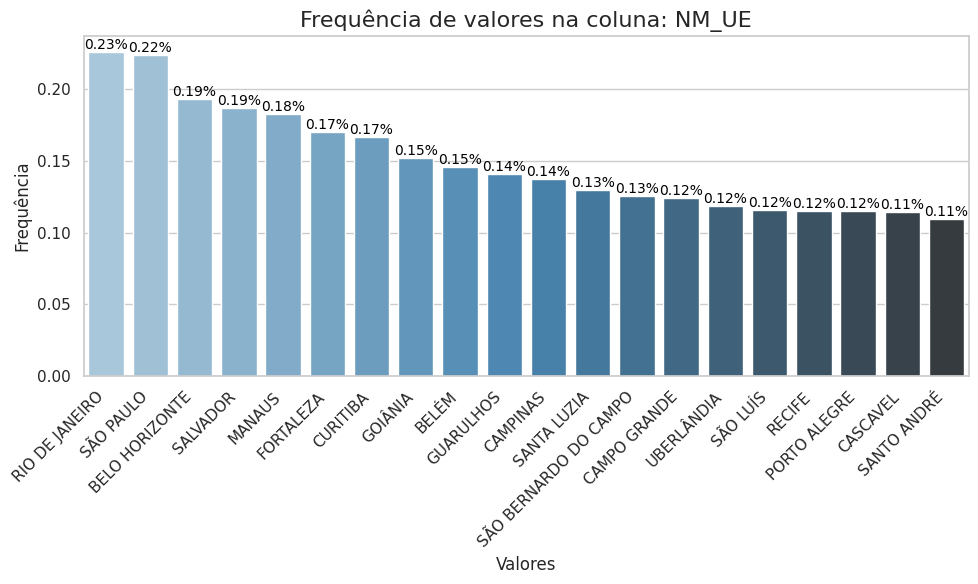

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


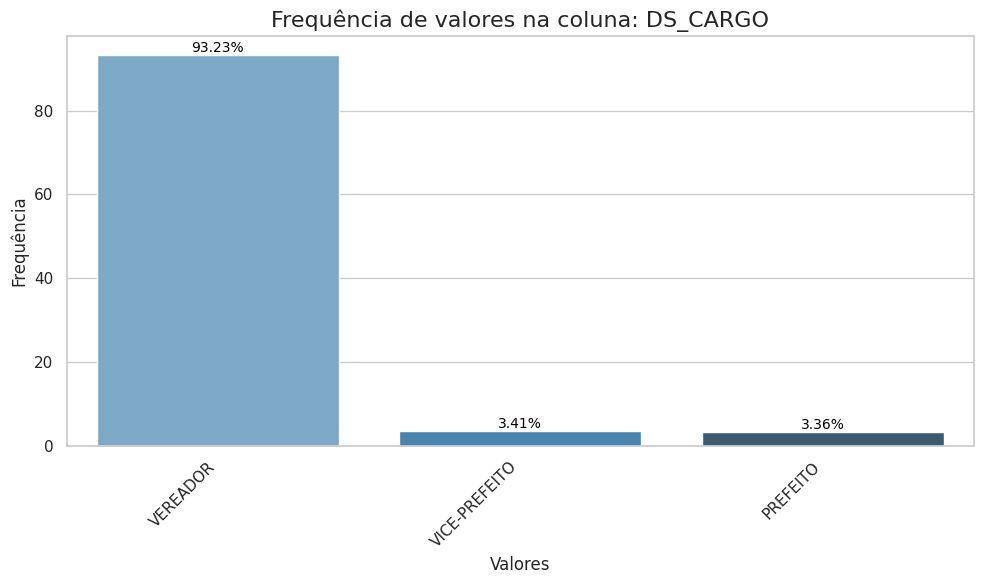

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

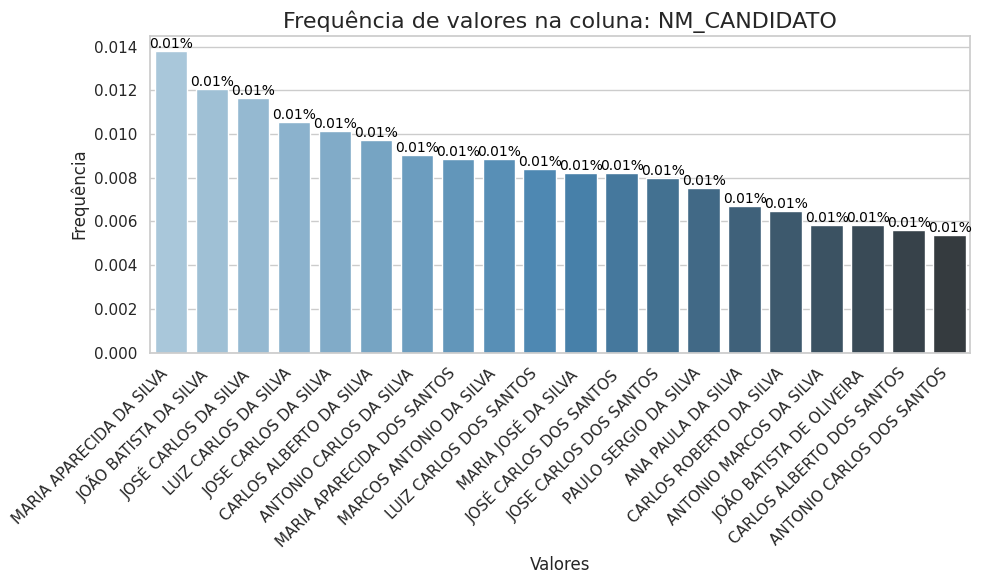

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

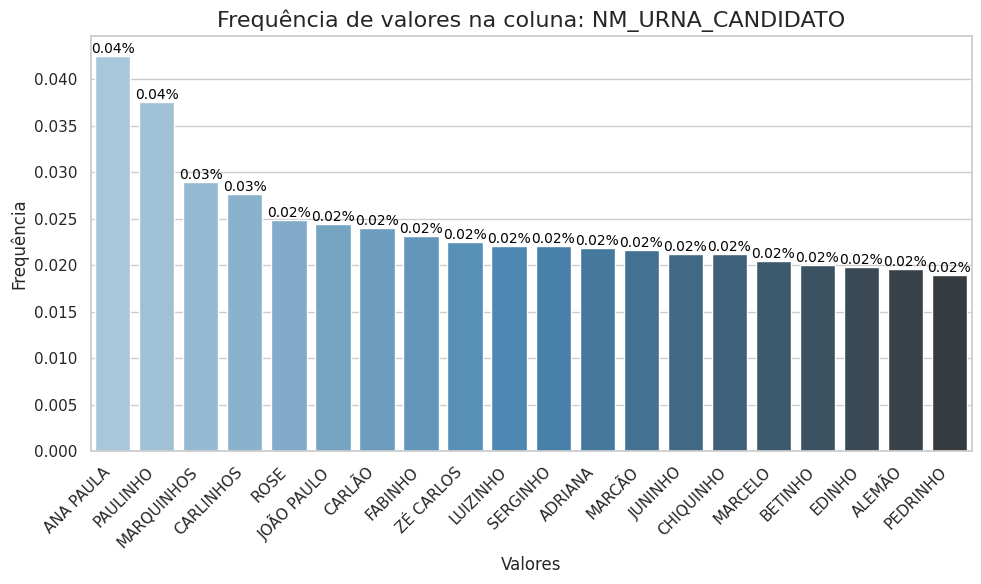

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

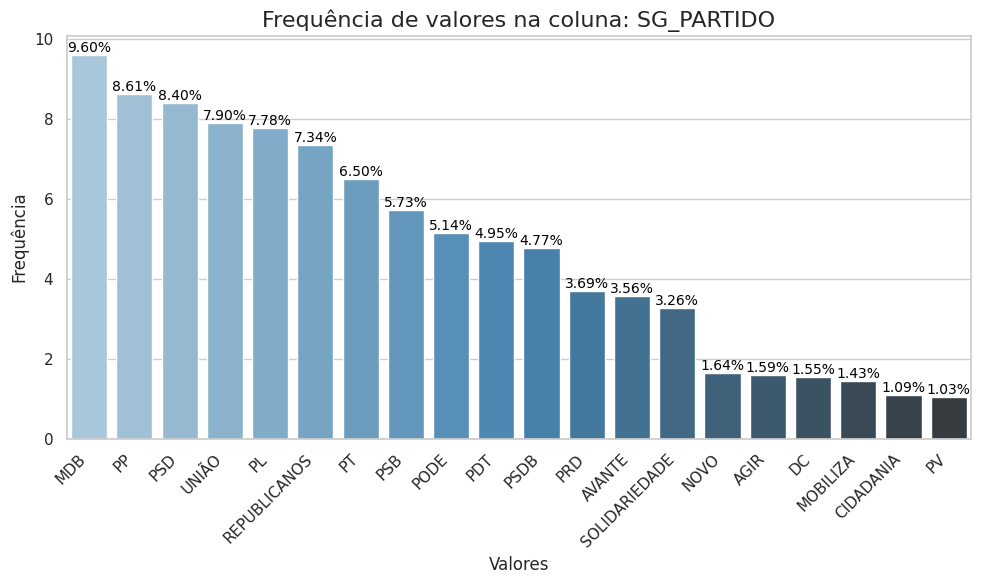

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

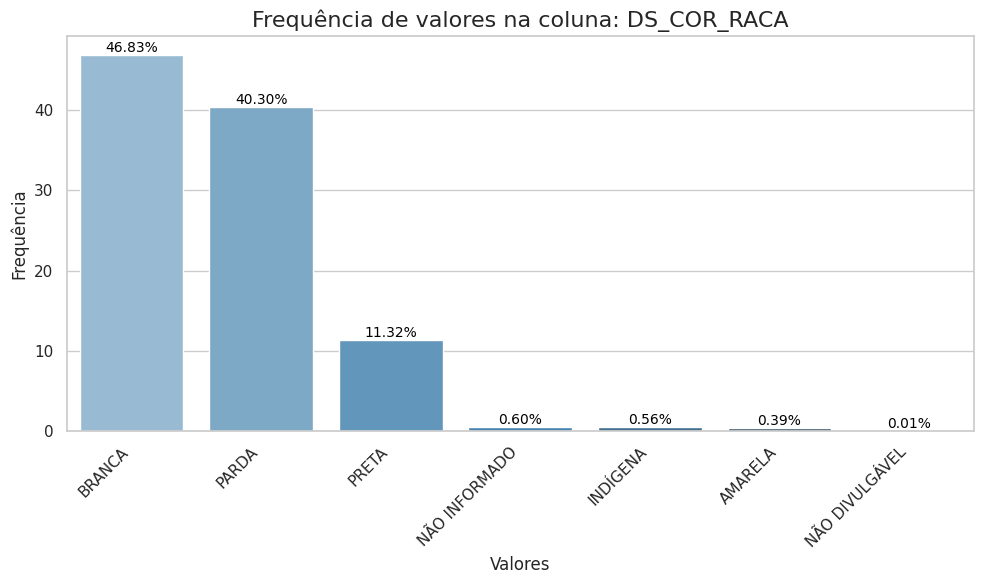

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

In [67]:
verificar_freq_colunas(df_candidatos)

**O perfil dos candidatos são homens, brancos ou pardos, casados, com Ensino Médio e sem profissão definida (outros)**

### Arquivo de com Dados dos Bens dos Candidatos

In [68]:
df_bens_cand['VR_BEM_CANDIDATO'].describe().reset_index()

index      VR_BEM_CANDIDATO
0  count            909,811.00
1   mean         27,019,317.38
2    std     25,631,237,393.40
3    min                  0.00
4    25%              8,500.00
5    50%             32,000.00
6    75%            100,000.00
7    max 24,448,100,150,781.00

In [69]:
df_bens_cand.sort_values('VR_BEM_CANDIDATO', ascending=False).head()

DT_GERACAO HH_GERACAO  ANO_ELEICAO    NM_TIPO_ELEICAO  \
229801 2024-09-30   19:30:36         2024  Eleição Ordinária   
116205 2024-09-30   19:30:36         2024  Eleição Ordinária   
73534  2024-09-30   19:30:36         2024  Eleição Ordinária   
13118  2024-09-30   19:30:36         2024  Eleição Ordinária   
107281 2024-09-30   19:30:36         2024  Eleição Ordinária   

                      DS_ELEICAO DT_ELEICAO SG_UF  SG_UE        NM_UE  \
229801  Eleições Municipais 2024 2024-10-06    PR  79090     TAMBOARA   
116205  Eleições Municipais 2024 2024-10-06    MG  46256     IPATINGA   
73534   Eleições Municipais 2024 2024-10-06    SP  66818      MARÍLIA   
13118   Eleições Municipais 2024 2024-10-06    PA   4723        ANAPU   
107281  Eleições Municipais 2024 2024-10-06    RS  86258  DOIS IRMÃOS   

        SQ_CANDIDATO  NR_ORDEM_BEM_CANDIDATO  \
229801  160002381679                       1   
116205  130002211844                       2   
73534   250001937618                       1   
13118   140002233548                       1   
107281  210002201027                       4   

                                    DS_TIPO_BEM_CANDIDATO  \
229801  Veículo automotor terrestre: caminhão, automóv...   
116205  Ações (inclusive as provenientes de linha tele...   
73534                    Outras participações societárias   
13118                                 Outros bens imóveis   
107281                      Quotas ou quinhões de capital   

                                         DS_BEM_CANDIDATO  \
229801                                           VEICULOS   
116205                                         SWC-220845   
73534   VR DE 95% DAS COTAS DE CAPITAL DA EMPRESA SUGA...   
13118              Imóvel rural denominado sítio caujeira   
107281  1.532.580.097 QUOTAS NA EMPRESA RGSC AMBIENTAL...   

            VR_BEM_CANDIDATO DT_ULT_ATUAL_BEM_CANDIDATO  \
229801 24,448,100,150,781.00                 2024-09-24   
116205     10,600,250,000.00                 2024-09-18   
73534       2,850,000,000.00                 2024-09-21   
13118       2,415,000,000.00                 2024-09-19   
107281      1,532,580,097.00                 2024-09-18   

       HH_ULT_ATUAL_BEM_CANDIDATO  
229801                   19:31:38  
116205                   18:23:23  
73534                    15:34:16  
13118                    16:06:23  
107281                   12:43:23

In [70]:
max_val = 10 * 1e12
print('O Produto Interno Bruto (PIB) do Brasil no ano de 2023 foi de aproximadamente R$ 10,9 trilhões. ')
print(f'Temos um candidatos com mais de R$ {(max_val/1e12):,.1f} Trilhões em bens?')

O Produto Interno Bruto (PIB) do Brasil no ano de 2023 foi de aproximadamente R$ 10,9 trilhões. 
Temos um candidatos com mais de R$ 10.0 Trilhões em bens?


In [71]:
df_bens_cand = df_bens_cand[df_bens_cand['VR_BEM_CANDIDATO'] < max_val]


In [72]:
df_bens_cand['VR_BEM_CANDIDATO'].describe().reset_index()

index  VR_BEM_CANDIDATO
0  count        909,810.00
1   mean        147,692.39
2    std     12,463,333.47
3    min              0.00
4    25%          8,500.00
5    50%         32,000.00
6    75%        100,000.00
7    max 10,600,250,000.00

In [73]:
#Agrupar o valor dos bens por candidato
df_bens_cand_grouped = df_bens_cand.groupby('SQ_CANDIDATO').agg(
    Valor_Total=('VR_BEM_CANDIDATO', 'sum'),
    Quantidade=('VR_BEM_CANDIDATO', 'count')
).reset_index()

df_bens_cand_grouped.describe()

SQ_CANDIDATO       Valor_Total  Quantidade
count         295,859.00        295,859.00  295,859.00
mean  159,652,914,203.49        454,175.85        3.08
std    68,392,318,569.39     24,292,152.68        3.84
min    10,001,885,335.00              0.00        1.00
25%   110,002,338,556.50         30,000.00        1.00
50%   160,001,920,772.00        111,000.00        2.00
75%   220,002,327,353.50        305,267.56        4.00
max   270,002,404,658.00 12,101,378,759.75      351.00

In [74]:
df_bens_cand_grouped.columns

Index(['SQ_CANDIDATO', 'Valor_Total', 'Quantidade'], dtype='object')

In [75]:
df_bens_cand_grouped[['Valor_Total']].sort_values('Valor_Total',ascending=False).head(10)

Valor_Total
111902 12,101,378,759.75
243100  2,851,300,000.00
138135  2,415,265,000.00
210594  1,542,273,922.21
294974  1,500,180,000.00
45591   1,401,171,000.00
138149  1,200,120,000.00
44280   1,102,131,121.00
5954    1,000,505,000.00
295158    830,780,620.00

### Arquivo de com Dados Complementares dos Candidatos

In [76]:
df_cand_compl.head()

DT_GERACAO HH_GERACAO  ANO_ELEICAO  SQ_CANDIDATO DS_DETALHE_SITUACAO_CAND  \
0 2024-09-30   08:31:44         2024  110001941658                      #NE   
1 2024-09-30   08:31:44         2024  240002361125                      #NE   
2 2024-09-30   08:31:44         2024  250002044742                      #NE   
3 2024-09-30   08:31:44         2024  130002146954                      #NE   
4 2024-09-30   08:31:44         2024  130002316166                      #NE   

  DS_NACIONALIDADE NM_MUNICIPIO_NASCIMENTO  NR_IDADE_DATA_POSSE ST_QUILOMBOLA  \
0  BRASILEIRA NATA                 GOIÂNIA                41.00             N   
1  BRASILEIRA NATA                   LAGES                46.00             N   
2  BRASILEIRA NATA            CASTRO ALVES                51.00             N   
3  BRASILEIRA NATA            JUIZ DE FORA                40.00             N   
4  BRASILEIRA NATA            NOVA RESENDE                67.00             N   

  DS_ETNIA_INDIGENA  VR_DESPESA_MAX_CAMPANHA ST_REELEICAO ST_DECLARAR_BENS  \
0            #NULO#               106,627.75            S                S   
1            #NULO#                15,985.08            N                S   
2     NÃO INFORMADO                62,359.03            N                S   
3            #NULO#                15,985.08            N                S   
4            #NULO#                23,718.40            N                S   

   NR_PROTOCOLO_CANDIDATURA          NR_PROCESSO DS_SITUACAO_CANDIDATO_PLEITO  \
0                        -1  6001361820246110025                          #NE   
1                        -1  6002077320246240052                          #NE   
2                        -1  6002680220246260367                          #NE   
3                        -1  6002929820246130235                          #NE   
4                        -1  6004864020246130125                          #NE   

  DS_SITUACAO_CANDIDATO_URNA ST_CANDIDATO_INSERIDO_URNA  \
0                        #NE                        SIM   
1                        #NE                        SIM   
2                        #NE                        SIM   
3                        #NE                        SIM   
4                        #NE                        SIM   

  NM_TIPO_DESTINACAO_VOTOS DS_SITUACAO_CANDIDATO_TOT ST_PREST_CONTAS  \
0                   Válido                  DEFERIDO               S   
1                   Válido                  DEFERIDO               S   
2                   Válido                  DEFERIDO               S   
3                   Válido                  DEFERIDO               S   
4                   Válido                  DEFERIDO               S   

  ST_SUBSTITUIDO  SQ_SUBSTITUIDO  SQ_ORDEM_SUPLENCIA DT_ACEITE_CANDIDATURA  \
0              N              -1                  -1                   NaT   
1              N              -1                  -1                   NaT   
2              N              -1                  -1                   NaT   
3              N              -1                  -1                   NaT   
4              N              -1                  -1                   NaT   

  DS_SITUACAO_JULGAMENTO DS_SITUACAO_JULGAMENTO_PLEITO  \
0               DEFERIDO                      DEFERIDO   
1               DEFERIDO                      DEFERIDO   
2               DEFERIDO                      DEFERIDO   
3               DEFERIDO                      DEFERIDO   
4               DEFERIDO                      DEFERIDO   

  DS_SITUACAO_JULGAMENTO_URNA DS_SITUACAO_CASSACAO DS_SITUACAO_CASSACAO_MIDIA  \
0                    DEFERIDO               #NULO#                     #NULO#   
1                    DEFERIDO               #NULO#                     #NULO#   
2                    DEFERIDO               #NULO#                     #NULO#   
3                    DEFERIDO               #NULO#                     #NULO#   
4                    DEFERIDO               #NULO#                     #N

In [77]:
df_cand_compl.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'SQ_CANDIDATO',
       'DS_DETALHE_SITUACAO_CAND', 'DS_NACIONALIDADE',
       'NM_MUNICIPIO_NASCIMENTO', 'NR_IDADE_DATA_POSSE', 'ST_QUILOMBOLA',
       'DS_ETNIA_INDIGENA', 'VR_DESPESA_MAX_CAMPANHA', 'ST_REELEICAO',
       'ST_DECLARAR_BENS', 'NR_PROTOCOLO_CANDIDATURA', 'NR_PROCESSO',
       'DS_SITUACAO_CANDIDATO_PLEITO', 'DS_SITUACAO_CANDIDATO_URNA',
       'ST_CANDIDATO_INSERIDO_URNA', 'NM_TIPO_DESTINACAO_VOTOS',
       'DS_SITUACAO_CANDIDATO_TOT', 'ST_PREST_CONTAS', 'ST_SUBSTITUIDO',
       'SQ_SUBSTITUIDO', 'SQ_ORDEM_SUPLENCIA', 'DT_ACEITE_CANDIDATURA',
       'DS_SITUACAO_JULGAMENTO', 'DS_SITUACAO_JULGAMENTO_PLEITO',
       'DS_SITUACAO_JULGAMENTO_URNA', 'DS_SITUACAO_CASSACAO',
       'DS_SITUACAO_CASSACAO_MIDIA', 'DS_SITUACAO_DIPLOMA'],
      dtype='object')

In [78]:
#Excluindo campos não necessários / repetidos
df_cand_compl.drop(columns=['DT_GERACAO','HH_GERACAO','ANO_ELEICAO',
                            'DS_DETALHE_SITUACAO_CAND',
                            'NR_PROTOCOLO_CANDIDATURA', 'NR_PROCESSO',
                            'DS_SITUACAO_CANDIDATO_PLEITO', 'DS_SITUACAO_CANDIDATO_URNA',
                            'ST_CANDIDATO_INSERIDO_URNA',
                            'ST_PREST_CONTAS', 'ST_SUBSTITUIDO',
                            'SQ_SUBSTITUIDO', 'SQ_ORDEM_SUPLENCIA', 'DT_ACEITE_CANDIDATURA',
                            'DS_SITUACAO_JULGAMENTO', 'DS_SITUACAO_JULGAMENTO_PLEITO',
                            'DS_SITUACAO_JULGAMENTO_URNA', 'DS_SITUACAO_CASSACAO',
                            'DS_SITUACAO_CASSACAO_MIDIA', 'DS_SITUACAO_DIPLOMA',
                            'NM_TIPO_DESTINACAO_VOTOS'
                            ], axis=1, inplace=True)


In [79]:
df_cand_compl.head()

SQ_CANDIDATO DS_NACIONALIDADE NM_MUNICIPIO_NASCIMENTO  NR_IDADE_DATA_POSSE  \
0  110001941658  BRASILEIRA NATA                 GOIÂNIA                41.00   
1  240002361125  BRASILEIRA NATA                   LAGES                46.00   
2  250002044742  BRASILEIRA NATA            CASTRO ALVES                51.00   
3  130002146954  BRASILEIRA NATA            JUIZ DE FORA                40.00   
4  130002316166  BRASILEIRA NATA            NOVA RESENDE                67.00   

  ST_QUILOMBOLA DS_ETNIA_INDIGENA  VR_DESPESA_MAX_CAMPANHA ST_REELEICAO  \
0             N            #NULO#               106,627.75            S   
1             N            #NULO#                15,985.08            N   
2             N     NÃO INFORMADO                62,359.03            N   
3             N            #NULO#                15,985.08            N   
4             N            #NULO#                23,718.40            N   

  ST_DECLARAR_BENS DS_SITUACAO_CANDIDATO_TOT  
0                S                  DEFERIDO  
1                S                  DEFERIDO  
2                S                  DEFERIDO  
3                S                  DEFERIDO  
4                S                  DEFERIDO

In [80]:
object_columns = df_cand_compl.select_dtypes(include='object').columns

# Substituir '#NULO#' por NaN nas colunas do tipo object
df_cand_compl[object_columns] = df_cand_compl[object_columns].replace('#NULO#', np.nan)
df_cand_compl[object_columns] = df_cand_compl[object_columns].replace('NÃO INFORMADO', np.nan)


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

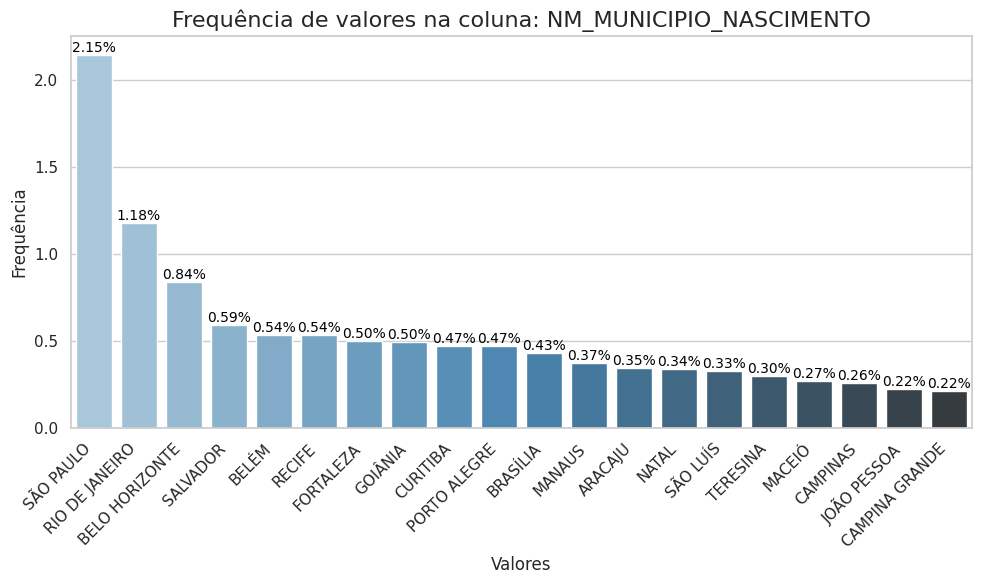

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


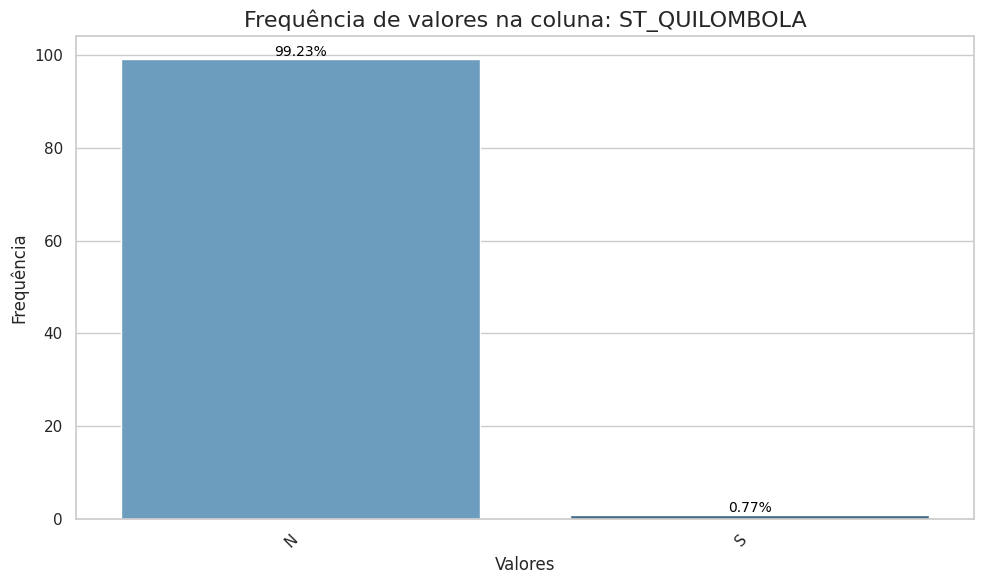

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

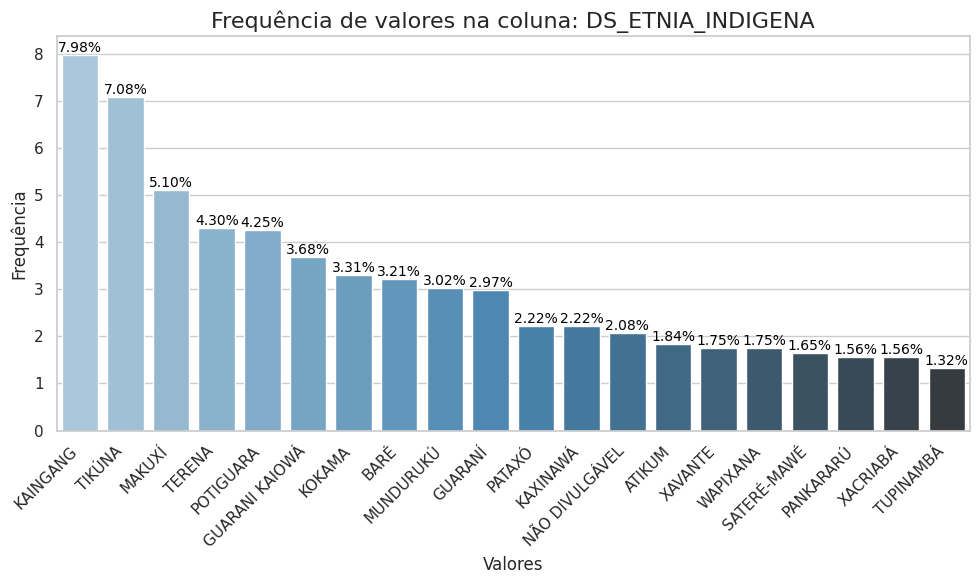

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


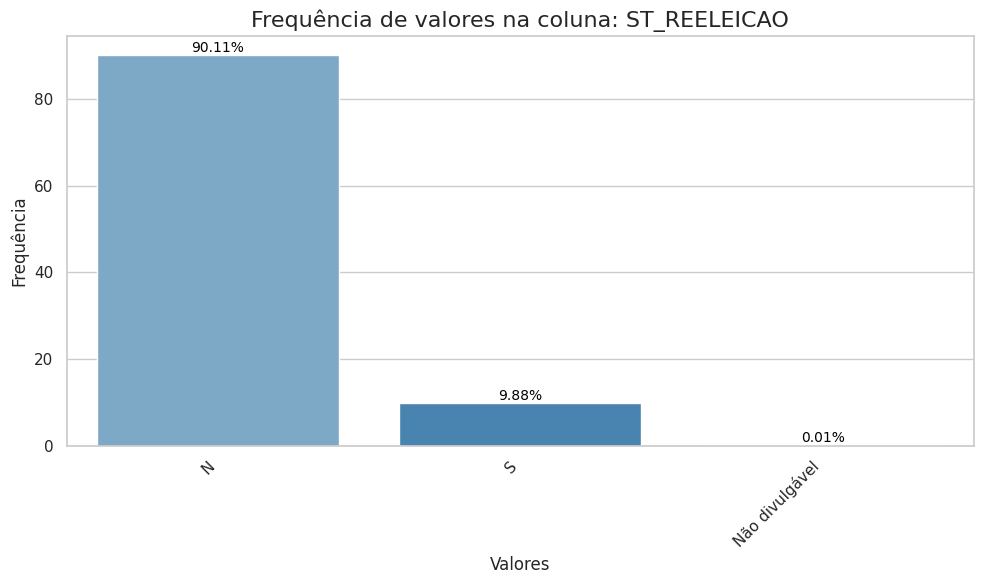

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


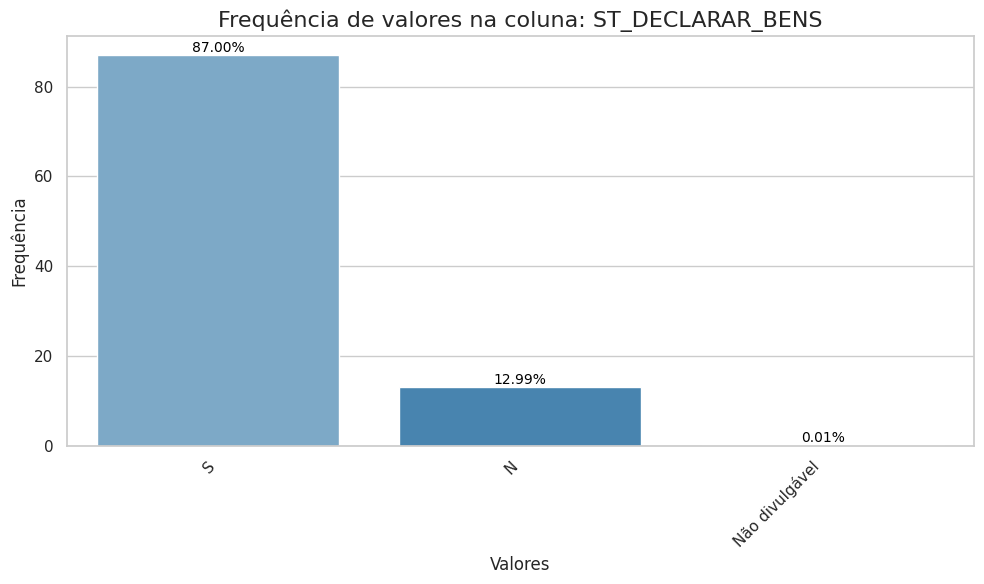

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

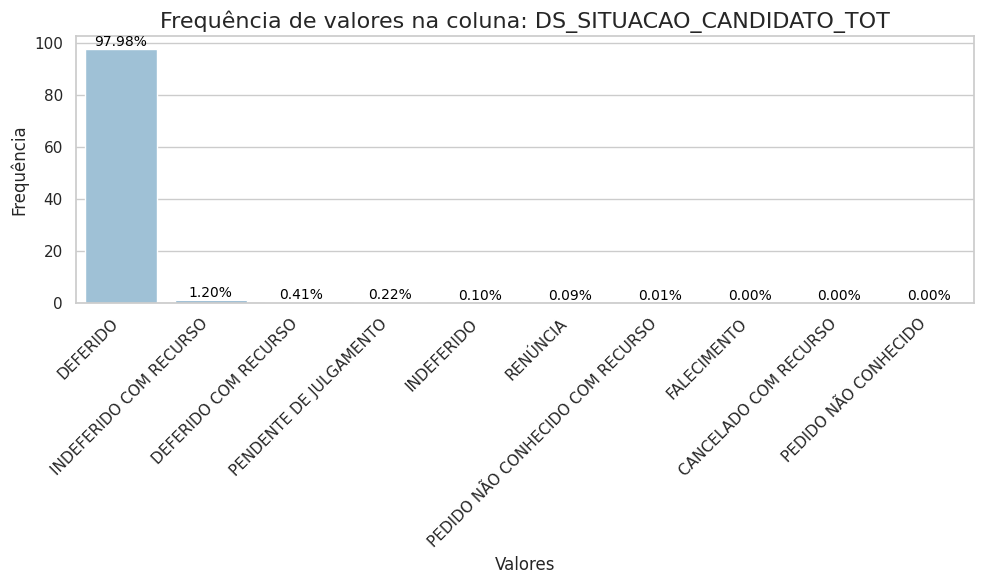

In [81]:
verificar_freq_colunas(df_cand_compl)

**O perfil dos candidatos também é formado por nascidos em São Paulo, declararam bens, e não estão em releeição**

### Unindo os arquivos

In [82]:
#Juntando os Dataframes
df_candidatos = df_candidatos.merge(df_cand_compl, on='SQ_CANDIDATO', how='left')

df_candidatos = df_candidatos.merge(df_bens_cand_grouped, on='SQ_CANDIDATO', how='left')

df_candidatos.head()

SG_UF                     NM_UE  DS_CARGO  SQ_CANDIDATO  NR_CANDIDATO  \
0    MG                CAMPO BELO  VEREADOR  130002111603         40222   
1    MT                    CUIABÁ  VEREADOR  110002387943         43777   
2    PE  SÃO JOSÉ DA COROA GRANDE  VEREADOR  170002311553         13113   
3    MG                     IJACI  VEREADOR  130002351592         77118   
4    SC            CAXAMBU DO SUL  VEREADOR  240002334154         15022   

                  NM_CANDIDATO           NM_URNA_CANDIDATO     SG_PARTIDO  \
0              JUAREZ DA SILVA      JUAREZ FURADOR DE POÇO            PSB   
1      MARCIA DE SOUZA CARDOSO  MARCIA EDUCADORA AMBIENTAL             PV   
2       ALDEIR MATIAS DA SILVA          SIVUCA ELETRONICA              PT   
3  ANTÔNIO DOMINGOS DOS SANTOS        JUNINHO DA ROSÂNGELA  SOLIDARIEDADE   
4              VELAMIR PEREIRA             VELAMIR PEREIRA            MDB   

  SG_UF_NASCIMENTO DT_NASCIMENTO  DS_GENERO              DS_GRAU_INSTRUCAO  \
0               MG    1961-03-01  MASCULINO  ENSINO FUNDAMENTAL INCOMPLETO   
1               SP    1978-10-20   FEMININO          ENSINO MÉDIO COMPLETO   
2               PE    1968-12-09  MASCULINO    ENSINO FUNDAMENTAL COMPLETO   
3               MG    1979-09-30  MASCULINO          ENSINO MÉDIO COMPLETO   
4               SC    1987-06-22  MASCULINO              SUPERIOR COMPLETO   

  DS_ESTADO_CIVIL DS_COR_RACA  \
0       CASADO(A)       PRETA   
1     SOLTEIRO(A)      BRANCA   
2     SOLTEIRO(A)      BRANCA   
3       CASADO(A)       PARDA   
4     SOLTEIRO(A)      BRANCA   

                                         DS_OCUPACAO DS_NACIONALIDADE  \
0                                             OUTROS  BRASILEIRA NATA   
1                                             OUTROS  BRASILEIRA NATA   
2                                             OUTROS  BRASILEIRA NATA   
3  OPERADOR DE IMPLEMENTO DE AGRICULTURA, PECUÁRI...  BRASILEIRA NATA   
4                                           ADVOGADO  BRASILEIRA NATA   

  NM_MUNICIPIO_NASCIMENTO  NR_IDADE_DATA_POSSE ST_QUILOMBOLA  \
0              CAMPO BELO                63.00             N   
1                  OSASCO                46.00             N   
2                RIBEIRÃO                56.00             N   
3                  LAVRAS                45.00             N   
4          CAXAMBU DO SUL                37.00             N   

  DS_ETNIA_INDIGENA  VR_DESPESA_MAX_CAMPANHA ST_REELEICAO ST_DECLARAR_BENS  \
0               NaN                31,538.60            N                S   
1               NaN               727,981.92            N                S   
2               NaN                15,985.08            N                S   
3               NaN                15,985.08            N                S   
4               NaN                30,858.86            N                S   

  DS_SITUACAO_CANDIDATO_TOT  Valor_Total  Quantidade  
0                INDEFERIDO    10,000.00        1.00  
1                INDEFERIDO          NaN         NaN  
2                INDEFERIDO          NaN         NaN  
3                INDEFERIDO          NaN         NaN  
4                INDEFERIDO   240,000.00        4.00

In [83]:
df_candidatos.columns

Index(['SG_UF', 'NM_UE', 'DS_CARGO', 'SQ_CANDIDATO', 'NR_CANDIDATO',
       'NM_CANDIDATO', 'NM_URNA_CANDIDATO', 'SG_PARTIDO', 'SG_UF_NASCIMENTO',
       'DT_NASCIMENTO', 'DS_GENERO', 'DS_GRAU_INSTRUCAO', 'DS_ESTADO_CIVIL',
       'DS_COR_RACA', 'DS_OCUPACAO', 'DS_NACIONALIDADE',
       'NM_MUNICIPIO_NASCIMENTO', 'NR_IDADE_DATA_POSSE', 'ST_QUILOMBOLA',
       'DS_ETNIA_INDIGENA', 'VR_DESPESA_MAX_CAMPANHA', 'ST_REELEICAO',
       'ST_DECLARAR_BENS', 'DS_SITUACAO_CANDIDATO_TOT', 'Valor_Total',
       'Quantidade'],
      dtype='object')

In [84]:
df_candidatos.isna().sum()

SG_UF                             0
NM_UE                             0
DS_CARGO                          0
SQ_CANDIDATO                      0
NR_CANDIDATO                      0
NM_CANDIDATO                      0
NM_URNA_CANDIDATO                 1
SG_PARTIDO                        0
SG_UF_NASCIMENTO                  0
DT_NASCIMENTO                    47
DS_GENERO                         0
DS_GRAU_INSTRUCAO                 0
DS_ESTADO_CIVIL                   0
DS_COR_RACA                       0
DS_OCUPACAO                       0
DS_NACIONALIDADE                  2
NM_MUNICIPIO_NASCIMENTO           2
NR_IDADE_DATA_POSSE              46
ST_QUILOMBOLA                     2
DS_ETNIA_INDIGENA            461253
VR_DESPESA_MAX_CAMPANHA           2
ST_REELEICAO                      2
ST_DECLARAR_BENS                  2
DS_SITUACAO_CANDIDATO_TOT     16946
Valor_Total                  167512
Quantidade                   167512
dtype: int64

In [85]:
df_candidatos['Valor_Total'].fillna(0, inplace=True)
df_candidatos['Quantidade'].fillna(0, inplace=True)

df_candidatos['DS_ETNIA_INDIGENA'].fillna('-', inplace=True)

df_candidatos.drop(columns='DS_SITUACAO_CANDIDATO_TOT', inplace=True)

df_candidatos.dropna(inplace=True)

<ipython-input-85-92237930e114>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_candidatos['Valor_Total'].fillna(0, inplace=True)
<ipython-input-85-92237930e114>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [86]:
df_candidatos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 463321 entries, 0 to 463370
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   SG_UF                    463321 non-null  object        
 1   NM_UE                    463321 non-null  object        
 2   DS_CARGO                 463321 non-null  object        
 3   SQ_CANDIDATO             463321 non-null  int64         
 4   NR_CANDIDATO             463321 non-null  int64         
 5   NM_CANDIDATO             463321 non-null  object        
 6   NM_URNA_CANDIDATO        463321 non-null  object        
 7   SG_PARTIDO               463321 non-null  object        
 8   SG_UF_NASCIMENTO         463321 non-null  object        
 9   DT_NASCIMENTO            463321 non-null  datetime64[ns]
 10  DS_GENERO                463321 non-null  object        
 11  DS_GRAU_INSTRUCAO        463321 non-null  object        
 12  DS_ESTADO_CIVIL      

In [87]:

df_candidatos.rename(columns={'SG_UF':'UF',
                              'NM_UE':'Cidade',
                              'DS_CARGO':'Cargo',
                              'NM_CANDIDATO':'Nome do Candidato',
                              'SG_PARTIDO':'Sigla Partido',
                              'NM_PARTIDO':'Nome Partido',
                              'SG_UF_NASCIMENTO':'UF Nascimento',
                              'DS_GENERO':'Genero',
                              'DS_GRAU_INSTRUCAO':'Grau de Instrução',
                              'DS_ESTADO_CIVIL':'Estado Civil',
                              'DS_COR_RACA':'Cor / Raça',
                              'DS_OCUPACAO':'Ocupação',
                              'DS_NACIONALIDADE':'Nacionalidade',
                              'NM_MUNICIPIO_NASCIMENTO':'Município Nascimento',
                              'NR_IDADE_DATA_POSSE':'Idade na Posse',
                              'ST_QUILOMBOLA': 'É quilombolo',
                              'DS_ETNIA_INDIGENA':'Etinia Indigena',
                              'VR_DESPESA_MAX_CAMPANHA':'Despesa Max Campanha',
                              'ST_REELEICAO':'É releição',
                              'ST_DECLARAR_BENS':'Declarou Bens',
                              'Valor_Total':'Valor Total Bens',
                              'Quantidade':'Quantidade de Bens'
                              }, inplace=True)

In [88]:
df_candidatos.columns

Index(['UF', 'Cidade', 'Cargo', 'SQ_CANDIDATO', 'NR_CANDIDATO',
       'Nome do Candidato', 'NM_URNA_CANDIDATO', 'Sigla Partido',
       'UF Nascimento', 'DT_NASCIMENTO', 'Genero', 'Grau de Instrução',
       'Estado Civil', 'Cor / Raça', 'Ocupação', 'Nacionalidade',
       'Município Nascimento', 'Idade na Posse', 'É quilombolo',
       'Etinia Indigena', 'Despesa Max Campanha', 'É releição',
       'Declarou Bens', 'Valor Total Bens', 'Quantidade de Bens'],
      dtype='object')

In [89]:
df_candidatos['Quantidade'] = 1

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

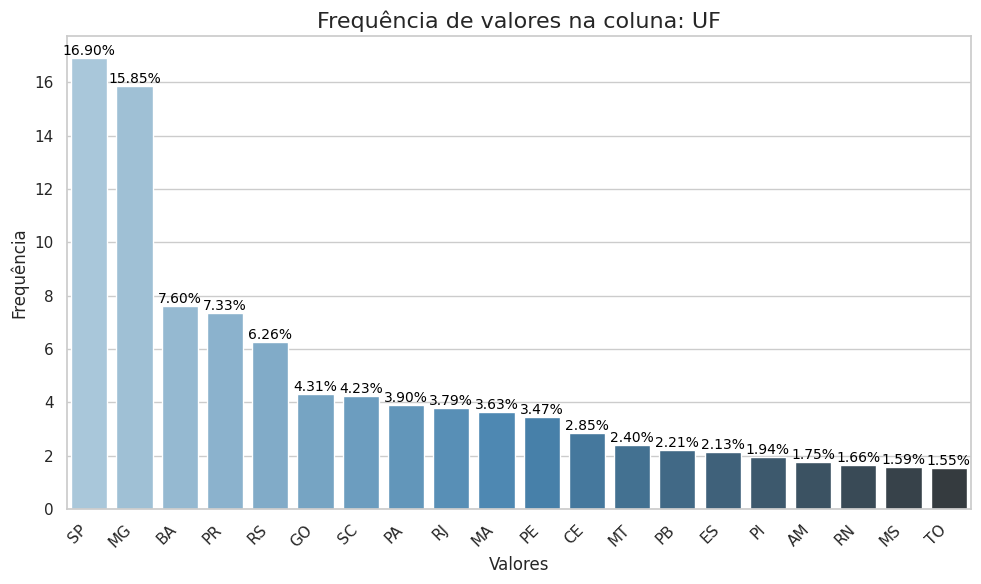

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

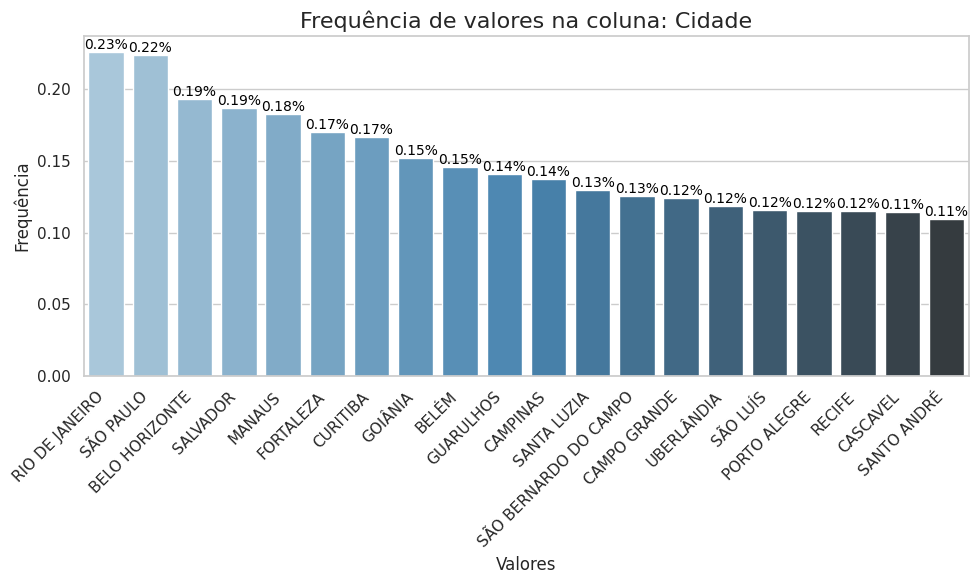

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


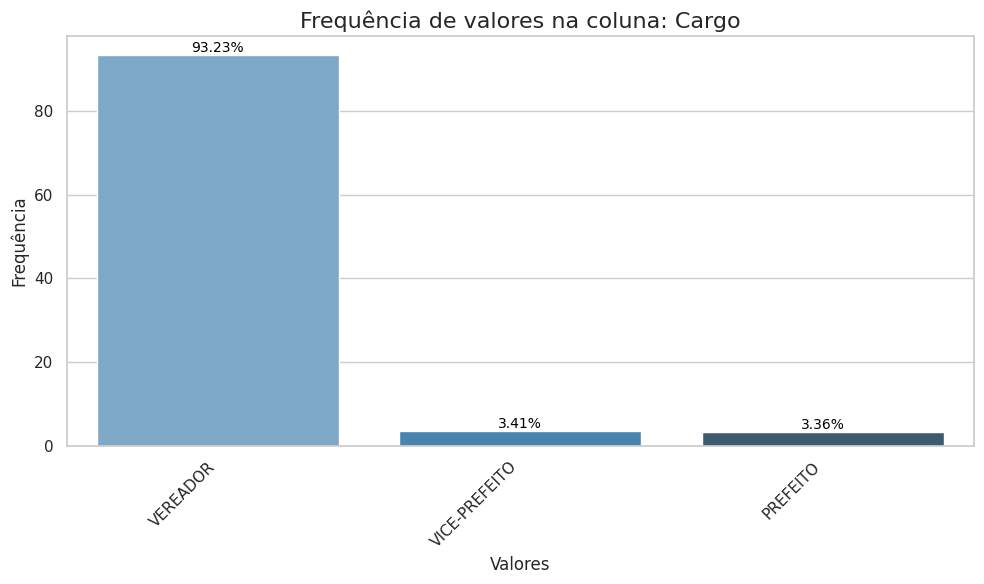

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

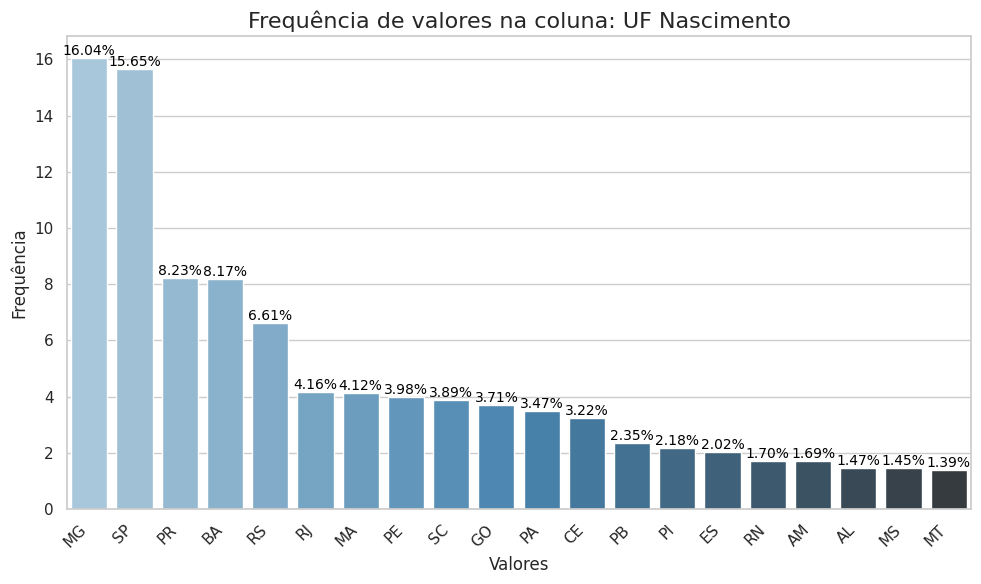

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


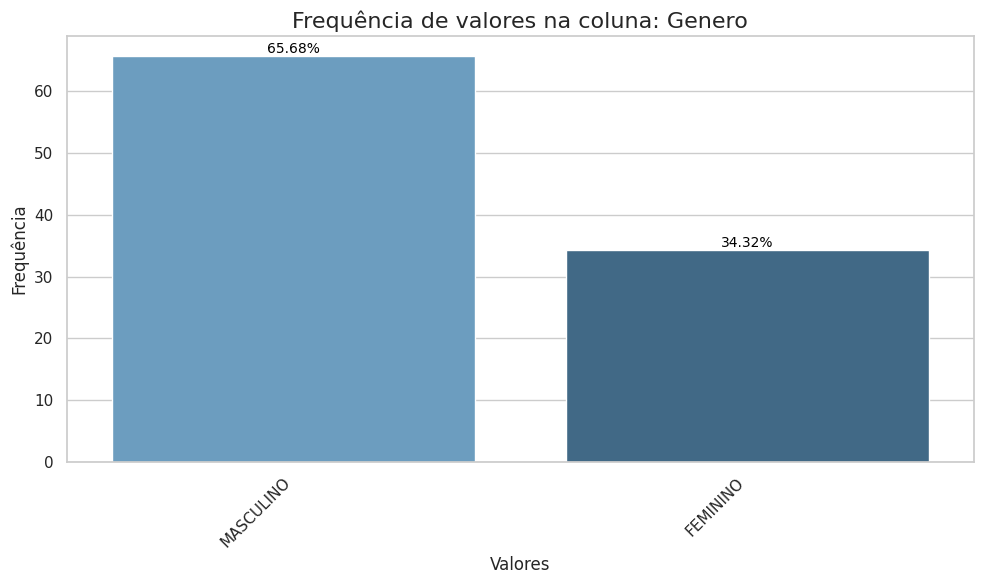

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

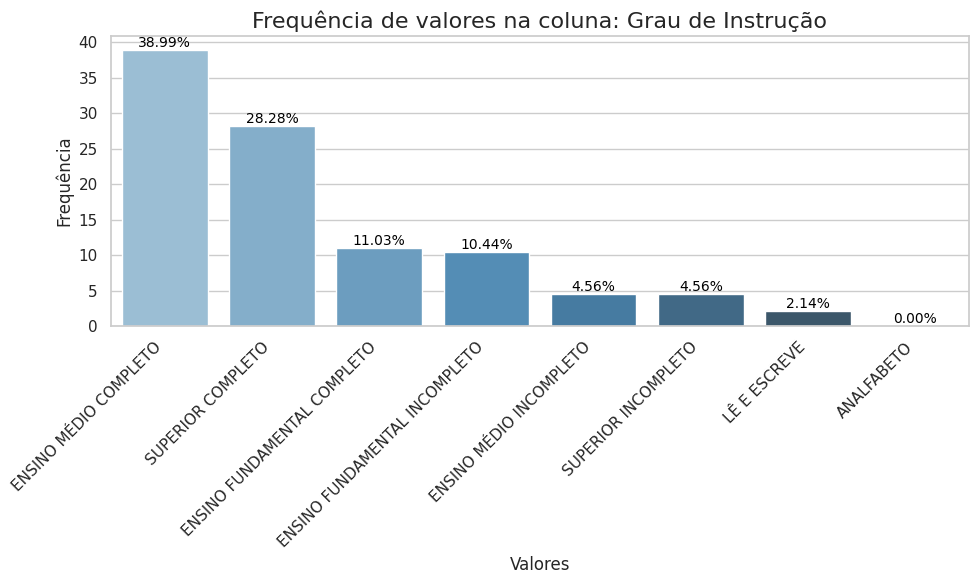

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

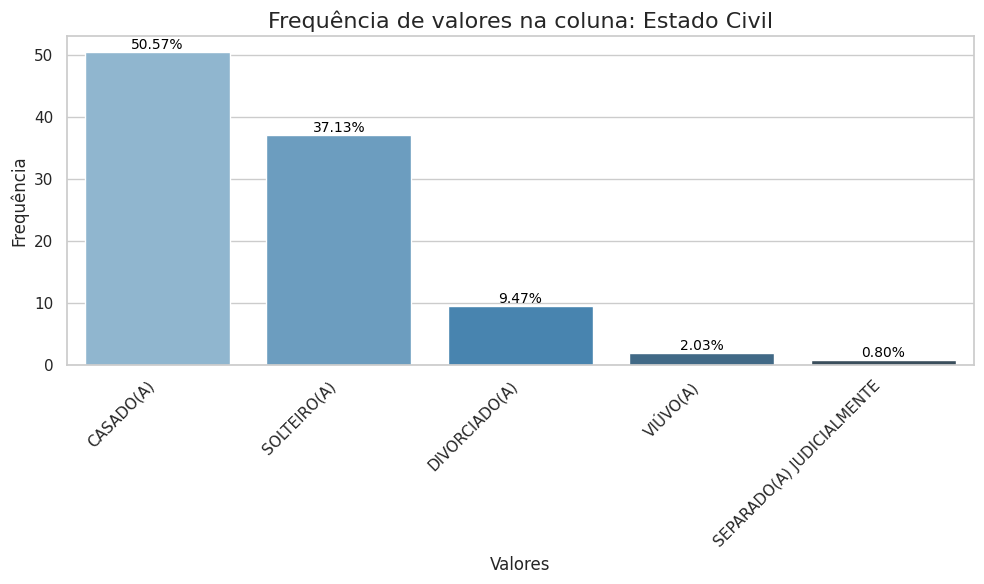

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

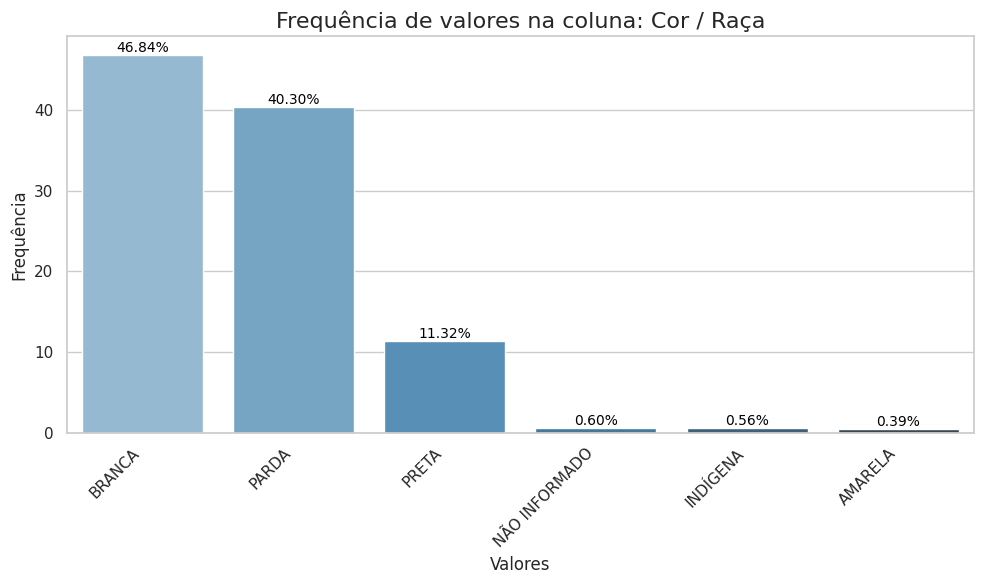

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

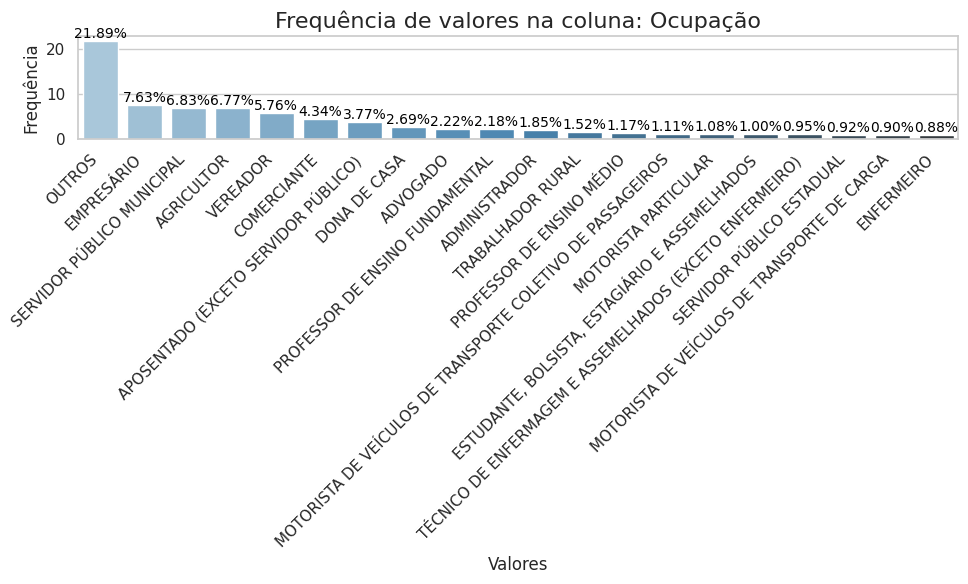

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

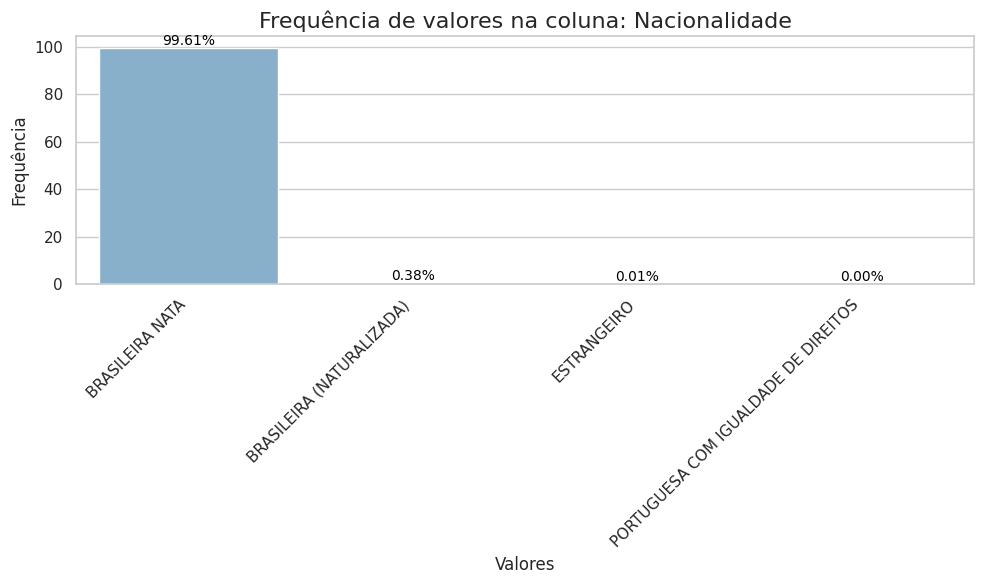

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

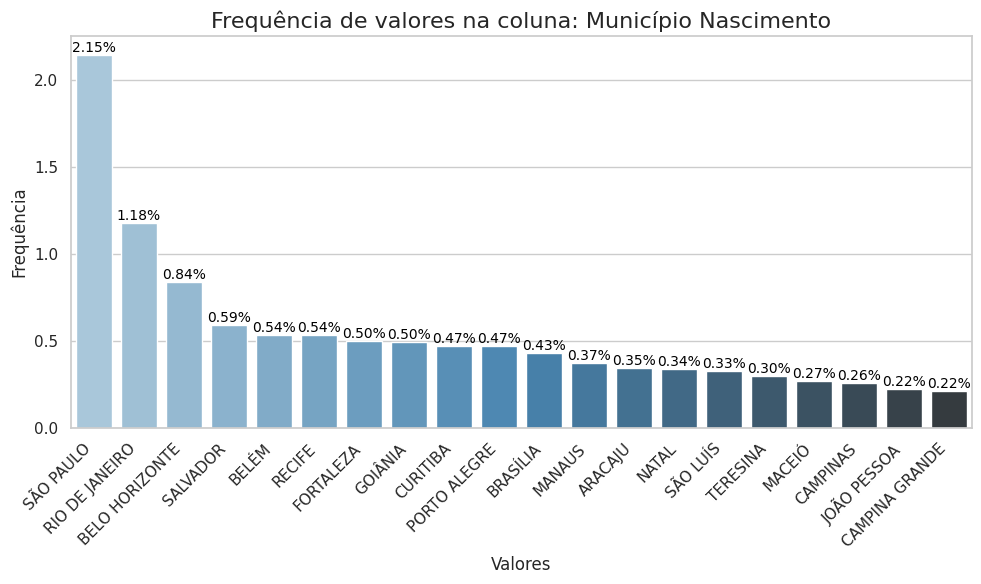

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


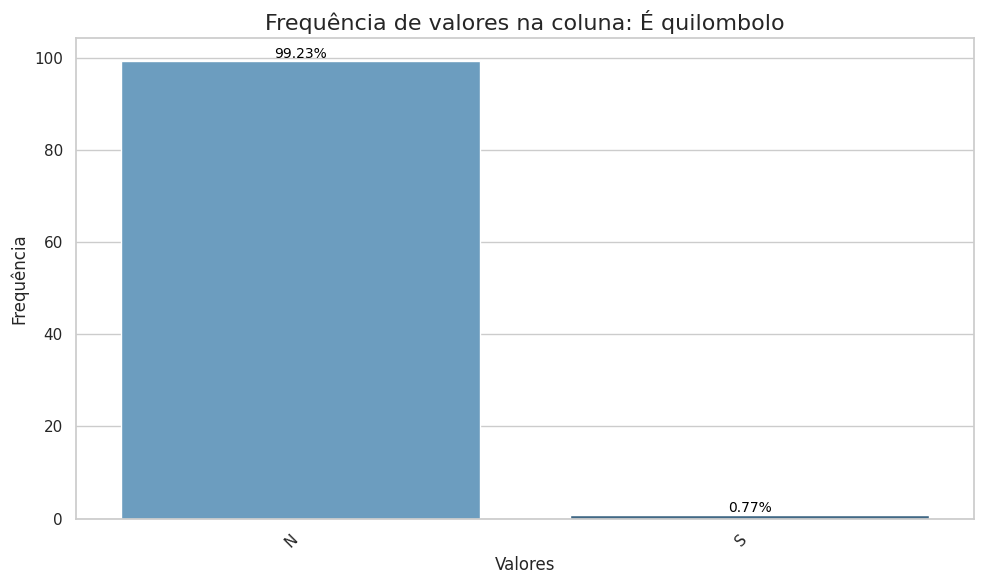

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


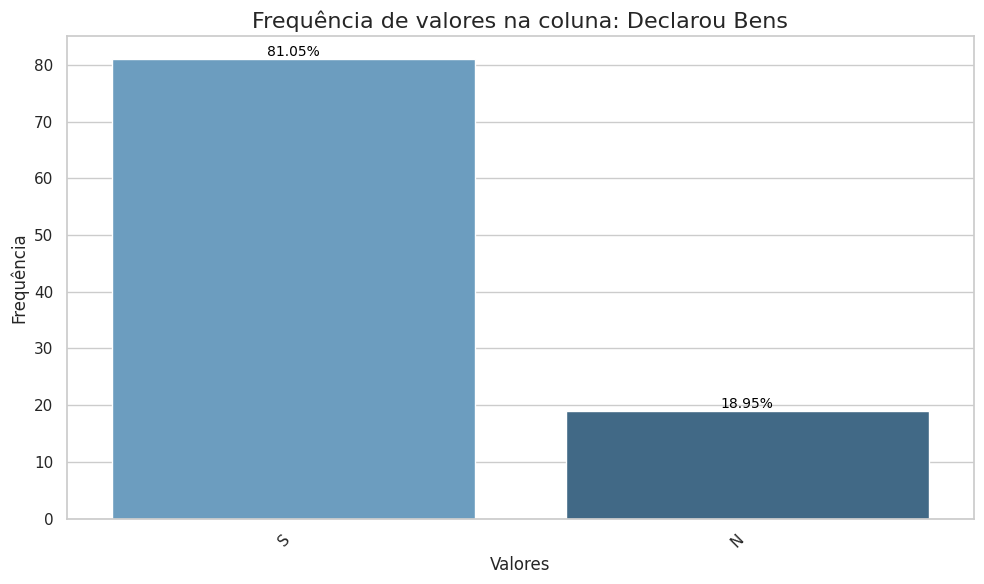

In [90]:
object_columns = df_candidatos.select_dtypes(include='object').columns

verificar_freq_colunas(df_candidatos[object_columns])

### Análises

In [91]:
df = df_candidatos.groupby('UF').agg({'Quantidade': 'sum', 'Despesa Max Campanha': 'sum'}).reset_index()

df['Despesa por Candidato']= df['Despesa Max Campanha']/ df['Quantidade']
df.sort_values('Despesa por Candidato',ascending=False, inplace=True)

grafico_barra_linha(df.sort_values('Despesa por Candidato', ascending=False),'UF','Despesa por Candidato', 'Quantidade')
df

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

UF  Quantidade  Despesa Max Campanha  Despesa por Candidato
17  RJ       17577      4,915,138,944.87             279,634.69
24  SP       78287     12,800,381,583.77             163,505.84
20  RR        1345        203,044,769.40             150,962.65
10  MS        7368      1,043,319,880.99             141,601.50
2   AM        8110      1,124,244,699.61             138,624.50
7   GO       19965      2,100,150,156.21             105,191.59
25  TO        7191        753,235,081.41             104,746.92
14  PE       16058      1,677,916,036.01             104,490.97
5   CE       13212      1,321,197,237.18              99,999.79
18  RN        7685        707,103,329.04              92,010.84
11  MT       11100        986,741,883.65              88,895.67
6   ES        9856        835,026,652.81              84,722.67
9   MG       73424      5,904,925,984.08              80,422.29
12  PA       18083      1,366,014,162.52              75,541.35
8   MA       16834      1,266,629,233.43              75,242.32
1   AL        5834        433,256,559.97              74,264.07
19  RO        4873        353,233,411.40              72,487.87
3   AP        1596        111,874,105.20              70,096.56
16  PR       33982      2,292,467,282.77              67,461.22
4   BA       35200      2,201,233,128.48              62,535.03
15  PI        8978        551,774,754.14              61,458.54
21  RS       29020      1,761,313,016.48              60,693.07
23  SE        5582        332,515,894.63              59,569.31
22  SC       19616      1,161,397,316.86              59,206.63
13  PB       10234        593,034,896.71              57,947.52
0   AC        2311        115,981,732.14              50,186.82

In [92]:
df = df_candidatos.groupby('Sigla Partido').agg({'Quantidade': 'sum', 'Despesa Max Campanha': 'sum'}).reset_index()

total = df['Despesa Max Campanha'].sum()

df['Despesa por Candidato']= df['Despesa Max Campanha']/ df['Quantidade']

df['Despesas Percentuais']= (df['Despesa Max Campanha']/ total) * 100

grafico_barra_linha(df.sort_values('Despesa por Candidato', ascending=False),'Sigla Partido','Despesa por Candidato', 'Quantidade');


df.sort_values('Despesa por Candidato',ascending=False, inplace=True)





/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

<ipython-input-62-d58bfd7af4e4>:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


UF  Despesas por Candidato_FEMININO  Despesas por Candidato_MASCULINO  \
17  RJ                       261,858.44                        288,717.65   
24  SP                       153,332.52                        168,798.25   
20  RR                       143,998.94                        154,852.01   
10  MS                       132,854.53                        146,453.96   
2   AM                       120,649.16                        148,103.02   
25  TO                       104,798.40                        104,719.23   
14  PE                       100,369.94                        106,641.32   
7   GO                        97,208.49                        109,461.16   
5   CE                        83,243.22                        109,179.00   
18  RN                        84,889.24                         95,793.71   
11  MT                        78,109.29                         94,742.91   
6   ES                        69,696.36                         92,355.38   
9   MG                        74,917.70                         83,207.66   
12  PA                        69,179.67                         78,983.51   
8   MA                        68,300.92                         79,073.63   
1   AL                        68,579.98                         77,115.62   
19  RO                        69,204.97                         74,207.35   
3   AP                        66,040.03                         72,307.42   
16  PR                        61,792.46                         70,384.22   
4   BA                        54,925.99                         66,460.80   
23  SE                        63,586.53                         57,412.49   
15  PI                        54,239.38                         65,103.21   
21  RS                        54,616.25                         63,920.33   
22  SC                        51,643.09                         63,188.22   
13  PB                        50,922.04                         61,542.24   
0   AC                        46,934.19                         51,945.40   

    Quantidade_FEMININO  Quantidade_MASCULINO  Despesas por Candidato  \
17                 5944                 11633              550,576.09   
24                26790                 51497              322,130.77   
20                  482                   863              298,850.94   
10                 2629                  4739              279,308.49   
2                  2800                  5310              268,752.18   
25                 2515                  4676              209,517.62   
14                 5506                 10552              207,011.25   
7                  6957                 13008              206,669.64   
5                  4676                  8536              192,422.22   
18                 2666                  5019              180,682.95   
11                 3902                  7198              172,852.20   
6                  3320                  6536              162,051.73   
9                 24670                 48754              158,125.36   
12                 6349                 11734              148,163.17   
8                  5987                 10847              147,374.55   
1                  1949                  3885              145,695.60   
19                 1675                  3198              143,412.31   
3                   563                  1033              138,347.45   
16                11561                 22421              132,176.68   
4                 11980                 23220              121,386.79   
23                 1950                  3632              120,999.02   
15                 3012                  5966              119,342.59   
21                10066                 18954              118,536.57   
22                 6765                 12851              114,831.31   
13                 3464                  6770              112,464.28   
0                   811   

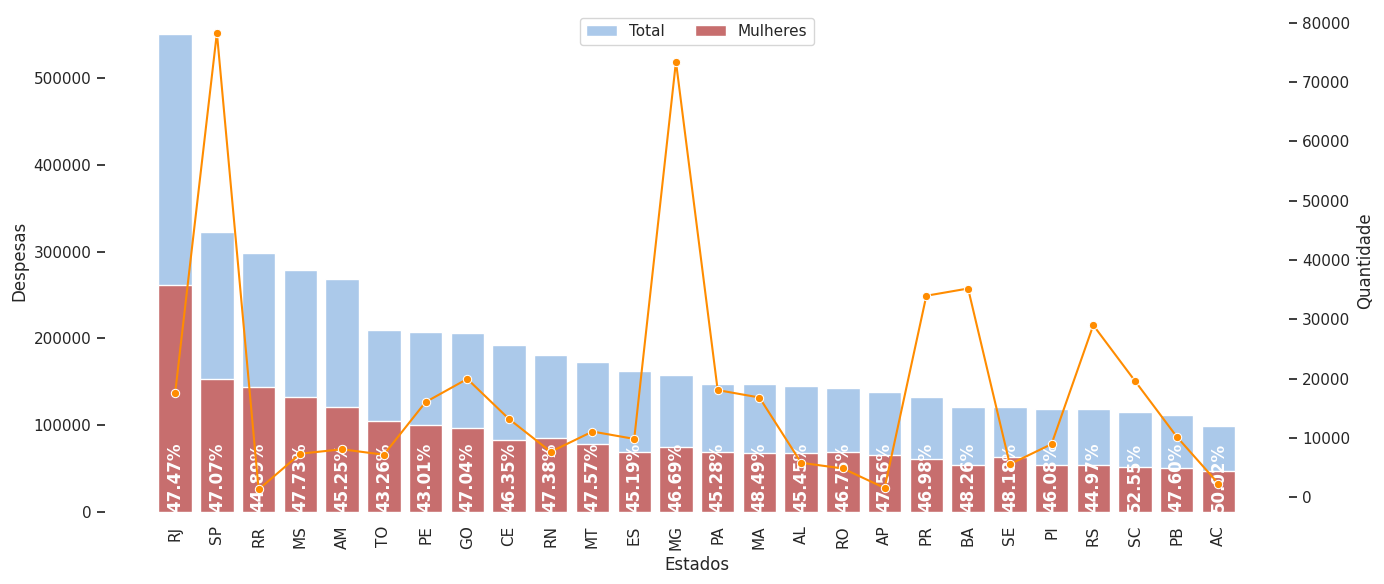

In [93]:
df = df_candidatos.groupby(['UF','Genero']).agg({'Quantidade': 'sum', 'Despesa Max Campanha': 'sum'}).reset_index()

df['Despesas por Candidato'] = df['Despesa Max Campanha'] / df['Quantidade']

# Criando uma tabela pivô, transformando 'Genero' em colunas
df_pivot = df.pivot_table(index='UF', columns='Genero', values=['Quantidade', 'Despesas por Candidato'], aggfunc='sum')

# Removendo a multi-index nas colunas
df_pivot.columns = ['_'.join(col).strip() for col in df_pivot.columns.values]

# Resetando o índice para deixar 'UF' como coluna normal
df_pivot.reset_index(inplace=True)

df_pivot['Despesas por Candidato'] = df_pivot['Despesas por Candidato_FEMININO'] + df_pivot['Despesas por Candidato_MASCULINO']

df_pivot['Quantidade'] = df_pivot['Quantidade_FEMININO'] + df_pivot['Quantidade_MASCULINO']


criar_grafico_barras_linha(df_pivot, 'Despesas por Candidato_FEMININO', 'Despesas por Candidato', 'Quantidade', 'UF', titulo=' ')

df_pivot

<ipython-input-62-d58bfd7af4e4>:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


Sigla Partido  Despesas por Candidato_FEMININO  \
28             UP                     2,569,860.25   
21           PSTU                     1,209,770.20   
9             PCO                     1,838,032.14   
8             PCB                       997,715.36   
20           PSOL                       274,974.13   
6            NOVO                       235,760.14   
16           PRTB                       193,709.04   
3              DC                       179,485.20   
12            PMB                       192,132.08   
5        MOBILIZA                       159,752.47   
24           REDE                       134,395.97   
0            AGIR                       124,168.38   
2       CIDADANIA                       112,316.75   
26  SOLIDARIEDADE                       106,354.46   
1          AVANTE                       104,805.62   
15            PRD                       106,552.42   
23             PV                        94,605.99   
10            PDT                        93,629.74   
13           PODE                        89,439.36   
17            PSB                        91,582.30   
11             PL                        81,124.67   
7         PC do B                        87,577.57   
19           PSDB                        77,782.99   
22             PT                        77,829.61   
25   REPUBLICANOS                        75,021.78   
27          UNIÃO                        73,078.06   
4             MDB                        66,196.78   
14             PP                        68,232.92   
18            PSD                        65,922.15   

    Despesas por Candidato_MASCULINO  Quantidade_FEMININO  \
28                      2,468,392.94                   59   
21                      3,045,752.31                   62   
9                       2,249,860.59                   60   
8                       2,639,705.63                   11   
20                        333,210.00                 1602   
6                         247,005.81                 2603   
16                        238,407.49                 1477   
3                         211,652.02                 2450   
12                        194,865.64                 1463   
5                         186,440.57                 2222   
24                        136,293.22                 1630   
0                         137,576.45                 2536   
2                         128,917.72                 1851   
26                        120,718.66                 5195   
1                         118,026.15                 5584   
15                        114,155.80                 5809   
23                        111,155.37                 1871   
10                        102,194.99                 7906   
13                        101,853.78                 8166   
17                         95,141.22                 9150   
11                         98,681.46                12051   
7                          86,180.51                 1299   
19                         94,801.80                 7588   
22                         88,319.53                10915   
25                         85,396.09                11526   
27                         85,294.42                12438   
4                          79,654.84                14987   
14                         76,075.05                13404   
18                         77,377.97                13074   

    Quantidade_MASCULINO  Despesas por Candidato  Quantidade  
28                    52            5,038,253.19         111  
21                    98            4,255,522.51         160  
9                    119            4,087,892.73         179  
8                     25            3,637,420.99          36  
20                  2364              608,184.13        3966  
6                   4998              482,765.95        7601  
16                  2812              432,116.52        4289  
3                   4721              391,137.22

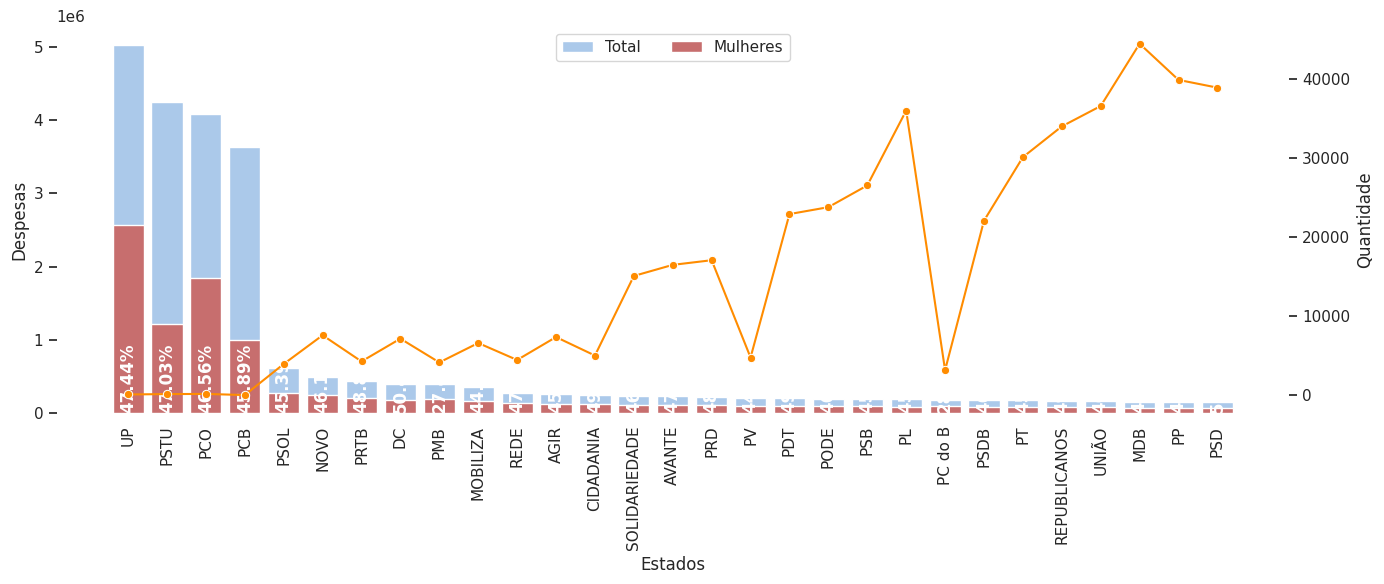

In [94]:
df = df_candidatos.groupby(['Sigla Partido','Genero']).agg({'Quantidade': 'sum', 'Despesa Max Campanha': 'sum'}).reset_index()

df['Despesas por Candidato'] = df['Despesa Max Campanha'] / df['Quantidade']

# Criando uma tabela pivô, transformando 'Genero' em colunas
df_pivot = df.pivot_table(index='Sigla Partido', columns='Genero', values=['Quantidade', 'Despesas por Candidato'], aggfunc='sum')

# Removendo a multi-index nas colunas
df_pivot.columns = ['_'.join(col).strip() for col in df_pivot.columns.values]

# Resetando o índice para deixar 'UF' como coluna normal
df_pivot.reset_index(inplace=True)

df_pivot['Despesas por Candidato'] = df_pivot['Despesas por Candidato_FEMININO'] + df_pivot['Despesas por Candidato_MASCULINO']

df_pivot['Quantidade'] = df_pivot['Quantidade_FEMININO'] + df_pivot['Quantidade_MASCULINO']


criar_grafico_barras_linha(df_pivot, 'Despesas por Candidato_FEMININO', 'Despesas por Candidato', 'Quantidade', 'Sigla Partido', titulo=' ')

df_pivot